# Idealista Market Study

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata
import csv
from unidecode import unidecode
import re
import matplotlib.ticker as ticker

### 1. Data Import & Treatment

#### 1.0 Data

In [2]:
df = pd.read_csv(
    "idealista_comp_links.csv",
    sep=";",
    header=0,
    encoding="utf-8",
    quotechar='"',
)

df.head(3)

,Title,Price,Type,Area,Floor,URL,Unique Key,Tipo Construção
0,"Apartamento T2 na rua da Liberdade, 19, Carreg...",199.000,T2,117 m² área bruta,3º andar com elevador,https://www.idealista.pt/comprar-casas/alenquer/,"Apartamento T2 na rua da Liberdade, 19, Carreg...",.
1,"Moradia independente, quinta Alenquer, Alenquer,",3.500.000,T14,1.475 m² área bruta,NaN,https://www.idealista.pt/comprar-casas/alenquer/,"Moradia independente, quinta Alenquer, Alenque...",.
2,"Moradia independente na rua Principal, 30, Abr...",250.000,T5,305 m² área bruta,NaN,https://www.idealista.pt/comprar-casas/alenquer/,"Moradia independente na rua Principal, 30, Abr...",.


#### 1.1 Removing "." from Price

In [3]:
df["Price"] = df["Price"].str.replace(".", "", regex=False)
df['Price'] = df['Price'].astype(float)

#### 1.2 Using Regex to Identify Location (as per my definition)

In [4]:
pd.set_option('display.width', 1000)

df['Locations'] = df['URL'].str.extract(r'comprar-casas/(.*?)(?:/pagina.*)?$').apply(lambda x: x.str.split('/'))

location_cols = df['Locations'].apply(pd.Series)
location_cols.columns = [f'Location_{i+1}' for i in range(location_cols.shape[1])]

df = pd.concat([df.drop('Locations', axis=1), location_cols], axis=1)

df.head(3)

,Title,Price,Type,Area,Floor,URL,Unique Key,Tipo Construção,Location_1,Location_2,Location_3,Location_4
0,"Apartamento T2 na rua da Liberdade, 19, Carreg...",199000.0,T2,117 m² área bruta,3º andar com elevador,https://www.idealista.pt/comprar-casas/alenquer/,"Apartamento T2 na rua da Liberdade, 19, Carreg...",.,alenquer,,NaN,NaN
1,"Moradia independente, quinta Alenquer, Alenquer,",3500000.0,T14,1.475 m² área bruta,NaN,https://www.idealista.pt/comprar-casas/alenquer/,"Moradia independente, quinta Alenquer, Alenque...",.,alenquer,,NaN,NaN
2,"Moradia independente na rua Principal, 30, Abr...",250000.0,T5,305 m² área bruta,NaN,https://www.idealista.pt/comprar-casas/alenquer/,"Moradia independente na rua Principal, 30, Abr...",.,alenquer,,NaN,NaN


In [5]:
pd.set_option('display.max_rows', None)

df["Location_1"].value_counts()

Location_1
lisboa                                                       11814
lagos                                                         5186
vila-nova-de-gaia                                             4049
sintra                                                        3808
porto                                                         3736
coimbra                                                       3716
viseu                                                         3633
matosinhos                                                    3574
santarem                                                      3441
seixal                                                        3240
quarteira                                                     3154
leiria                                                        3078
castelo-branco                                                3069
viana-do-castelo                                              3039
cascais-e-estoril                                  

In [6]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', None)

df["Concelho"] = df["Location_1"].replace({
    "albufeira": "Albufeira",
    "albufeira-e-olhos-de-agua": "Albufeira",
    "aljezur": "Aljezur",
    "castro-marim": "Castro Marim",
    "faro": "Faro",
    "lagoa-algarve": "Lagoa (Algarve)",
    "lagos": "Lagos",
    "loule": "Loulé",
    "olhao": "Olhão",
    "portimao": "Portimão",
    "quarteira": "Loulé",
    "sao-bras-de-alportel": "São Brás de Alportel",
    "silves": "Silves",
    "tavira": "Tavira",
    "vila-do-bispo": "Vila do Bispo",
    "vila-real-de-santo-antonio": "Vila Real de Santo António",
    "amadora": "Amadora",
    "arruda-dos-vinhos": "Arruda dos Vinhos",
    "cascais": "Cascais",
    "cascais-e-estoril": "Cascais",
    "lisboa": "Lisboa",
    "loures": "Loures",
    "lourinha": "Lourinhã",
    "mafra": "Mafra",
    "odivelas": "Odivelas",
    "sintra": "Sintra",
    "sobral-de-monte-agraco": "Sobral de Monte Agraço",
    "torres-vedras": "Torres Vedras",
    "vila-franca-de-xira": "Vila Franca de Xira",
    "alenquer": "Alenquer",
    "amarante": "Amarante",
    "baiao": "Baião",
    "felgueiras": "Felgueiras",
    "gondomar": "Gondomar",
    "lousada": "Lousada",
    "maia": "Maia",
    "marco-de-canaveses": "Marco de Canaveses",
    "paredes": "Paredes",
    "penafiel": "Penafiel",
    "pacos-de-ferreira": "Paços de Ferreira",
    "povoa-de-varzim": "Póvoa de Varzim",
    "matosinhos": "Porto",
    "vila-do-conde": "Porto",
    "valongo": "Porto",
    "santo-tirso": "Porto",
    "trofa": "Porto",
    "matosinhos": "Matosinhos",
    "vila-do-conde": "Vila do Conde",
    "valongo": "Valongo",
    "santo-tirso": "Santo Tirso",
    "trofa": "Trofa",
    "lagoa-algarve": "Lagoa",
    "lousada": "Lousada",
    "sobral-de-monte-agraco": "Sobral de Monte Agraço",
    "vila-nova-de-gaia": "Vila Nova de Gaia",
    "porto": "Porto",
    "cedofeita-santo-ildefonso-se-miragaia-sao-nicolau-vitoria": "Porto",
    "canidelo": "Vila Nova de Gaia",
    "santa-marinha-e-sao-pedro-da-afurada": "Vila Nova de Gaia",
    "paranhos": "Porto",
    "cadaval": "Cadaval",
    "oeiras": "Oeiras",
    "montijo": "Montijo",
    "sesimbra": "Sesimbra",
    "palmela": "Palmela",
    "barreiro": "Barreiro",
    "grandola": "Grândola",
    "moita": "Moita",
    "alcochete": "Alcochete",
    "santiago-do-cacem": "Santiago do Cacém",
    "alcacer-do-sal": "Alcácer do Sal",
    "setubal": "Setúbal",
    "seixal": "Setúbal",
    "almada": "Setúbal",
    "leiria": "Leiria",
    "braga": "Braga",
    "guimaraes": "Guimarães",
    "caldas-da-rainha": "Caldas da Rainha",
    "vila-nova-de-famalicao": "Vila Nova de Famalicão",
    "alcobaca": "Alcobaça",
    "barcelos": "Barcelos",
    "vila-verde": "Vila Verde",
    "peniche": "Peniche",
    "obidos": "Óbidos",
    "esposende": "Esposende",
    "nazare": "Nazaré",
    "marinha-grande": "Marinha Grande",
    "povoa-de-lanhoso": "Póvoa de Lanhoso",
    "fafe": "Fafe",
    "amares": "Amares",
    "bombarral": "Bombarral",
    "vieira-do-minho": "Vieira do Minho",
    "terras-de-bouro": "Terras de Bouro",
    "vizela": "Vizela",
    "celorico-de-basto": "Celorico de Basto",
    "cabeceiras-de-basto": "Cabeceiras de Basto",
    "aveiro": "Aveiro",
    "santa-maria-da-feira": "Santa Maria da Feira",
    "oliveira-de-azemeis": "Oliveira de Azeméis",
    "ilhavo": "Ílhavo",
    "ovar": "Ovar",
    "espinho": "Espinho",
    "sao-joao-da-madeira": "São João da Madeira",
    "oliveira-do-bairro": "Oliveira do Bairro",
    "vagos": "Vagos",
    "estarreja": "Estarreja",
    "santarem": "Santarém",
    "coimbra": "Coimbra",
    "rio-maior": "Rio Maior",
    "tomar": "Tomar",
    "benavente": "Benavente",
    "entroncamento": "Entroncamento",
    "almeirim": "Almeirim",
    "figueira-da-foz": "Figueira da Foz",
    "alpiarca": "Alpiarça",
    "viana-do-castelo": "Viana do Castelo",
    "ponte-de-lima": "Ponte de Lima",
    "caminha": "Caminha",
    "viseu": "Viseu",
    "castelo-branco": "Castelo Branco",
    "evora": "Évora",
    "portalegre": "Portalegre",
    "beja": "Beja",
    "vila-real": "Vila Real",
    "odemira": "Odemira",
    "chaves": "Chaves",
    "barrancos": "Barrancos",
    "guarda-distrito": "Guarda",
    "braganca-distrito": "Bragança"
    })

# Check for missing Concelho
blank_concelho = df[(df['Concelho'].isnull())]
print(blank_concelho)

Empty DataFrame
Columns: [Title, Price, Type, Area, Floor, URL, Unique Key, Tipo Construção, Location_1, Location_2, Location_3, Location_4, Concelho]
Index: []


In [7]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', None)

df["Distrito"] = df["Concelho"].replace({
    "Albufeira": "Faro",
    "Albufeira": "Faro",
    "Aljezur": "Faro",
    "Castro Marim": "Faro",
    "Faro": "Faro",
    "Lagoa (Algarve)": "Faro",
    "Lagos": "Faro",
    "Loulé": "Faro",
    "Olhão": "Faro",
    "Portimão": "Faro",
    "Loulé": "Faro",
    "São Brás de Alportel": "Faro",
    "Silves": "Faro",
    "Tavira": "Faro",
    "Vila do Bispo": "Faro",
    "Vila Real de Santo António": "Faro",
    "Amadora": "Lisboa",
    "Arruda dos Vinhos": "Lisboa",
    "Cascais": "Lisboa",
    "Cascais": "Lisboa",
    "Lisboa": "Lisboa",
    "Loures": "Lisboa",
    "Lourinhã": "Lisboa",
    "Mafra": "Lisboa",
    "Odivelas": "Lisboa",
    "Sintra": "Lisboa",
    "Sobral de Monte Agraço": "Lisboa",
    "Torres Vedras": "Lisboa",
    "Vila Franca de Xira": "Lisboa",
    "Alenquer": "Lisboa",
    "Amarante": "Porto",
    "Baião": "Porto",
    "Felgueiras": "Porto",
    "Gondomar": "Porto",
    "Lousada": "Porto",
    "Maia": "Porto",
    "Marco de Canaveses": "Porto",
    "Paredes": "Porto",
    "Penafiel": "Porto",
    "Paços de Ferreira": "Porto",
    "Póvoa de Varzim": "Porto",
    "Porto": "Porto",
    "Matosinhos": "Porto",
    "Vila do Conde": "Porto",
    "Valongo": "Porto",
    "Santo Tirso": "Porto",
    "Trofa": "Porto",
    "Lagoa": "Porto",
    "Lousada": "Porto",
    "Sobral de Monte Agraço": "Porto",
    "Vila Nova de Gaia": "Porto",
    "Porto": "Porto",
    "Cadaval": "Lisboa",
    "Oeiras": "Lisboa",
    "Montijo": "Setúbal",
    "Sesimbra": "Setúbal",
    "Palmela": "Setúbal",
    "Barreiro": "Setúbal",
    "Grândola": "Setúbal",
    "Moita": "Setúbal",
    "Alcochete": "Setúbal",
    "Santiago do Cacém": "Setúbal",
    "Alcácer do Sal": "Setúbal",
    "Setúbal": "Setúbal",
    "Leiria": "Leiria",
    "Braga": "Braga",
    "Guimarães": "Braga",
    "Caldas da Rainha": "Leiria",
    "Vila Nova de Famalicão": "Braga",
    "Alcobaça": "Leiria",
    "Barcelos": "Braga",
    "Vila Verde": "Braga",
    "Peniche": "Leiria",
    "Óbidos": "Leiria",
    "Esposende": "Braga",
    "Nazaré": "Leiria",
    "Marinha Grande": "Leiria",
    "Póvoa de Lanhoso": "Braga",
    "Fafe": "Braga",
    "Amares": "Braga",
    "Bombarral": "Leiria",
    "Vieira do Minho": "Braga",
    "Terras de Bouro": "Braga",
    "Vizela": "Braga",
    "Celorico de Basto": "Braga",
    "Cabeceiras de Basto": "Braga",
    "Aveiro": "Aveiro",
    "Santa Maria da Feira": "Aveiro",
    "Oliveira de Azeméis": "Aveiro",
    "Ílhavo": "Aveiro",
    "Ovar": "Aveiro",
    "Espinho": "Aveiro",
    "São João da Madeira": "Aveiro",
    "Oliveira do Bairro": "Aveiro",
    "Vagos": "Aveiro",
    "Estarreja": "Aveiro",
    "Santarém": "Santarém",
    "Coimbra": "Coimbra",
    "Rio Maior": "Santarém",
    "Tomar": "Santarém",
    "Benavente": "Santarém",
    "Entroncamento": "Santarém",
    "Almeirim": "Santarém",
    "Alpiarça": "Santarém",
    "Figueira da Foz": "Coimbra",
    "Viana do Castelo": "Viana do Castelo",
    "Ponte de Lima": "Viana do Castelo",
    "Caminha": "Viana do Castelo",
    "Castelo Branco": "Castelo Branco",
    "Viseu": "Viseu",
    "Seixal": "Setúbal",
    "Évora": "Évora",
    "Portalegre": "Portalegre",
    "Beja": "Beja",
    "Guimarães": "Braga",
    "Figueira da Foz": "Coimbra",
    "Vila Real": "Vila Real",
    "Ílhavo": "Aveiro",
    "Esposende": "Braga",
    "Nazaré": "Leiria",
    "Marinha Grande": "Leiria",
    "Póvoa de Lanhoso": "Braga",
    "Cadaval": "Lisboa",
    "Amares": "Braga",
    "Penafiel": "Porto",
    "Almeirim": "Santarém",
    "Alpiarça": "Santarém",
    "Sobral de Monte Agraço": "Lisboa",
    "Barrancos": "Beja",
    "Lourinhã": "Lisboa",
    "Vagos": "Aveiro",
    "Estarreja": "Aveiro",
    "Rio Maior": "Santarém",
    "Aljezur": "Faro",
    "Portimão": "Faro",
    "Vila do Bispo": "Faro",
    "São Brás de Alportel": "Faro",
    "Trofa": "Porto",
    "Santo Tirso": "Porto",
    "Valongo": "Porto",
    "Paredes": "Porto",
    "Ovarios": "Aveiro",
    "Vieira do Minho": "Braga",
    "Castro Marim": "Faro",
    "Bombarral": "Leiria",
    "Peniche": "Leiria",
    "Ovelha": "Porto",
    "Vila Verde": "Braga",
    "Viseu": "Viseu",
    "Castelo Branco": "Castelo Branco",
    "Évora": "Évora",
    "Portalegre": "Portalegre",
    "Beja": "Beja",
    "Vila Real": "Vila Real",
    "Odemira": "Beja",
    "Chaves": "Vila Real",
    "Barrancos": "Beja",
    "Guarda": "Guarda",
    "Bragança": "Bragança"
    })

# Check for missing Distrito
blank_distrito = df[(df['Distrito'].isnull())]
print(blank_distrito)

Empty DataFrame
Columns: [Title, Price, Type, Area, Floor, URL, Unique Key, Tipo Construção, Location_1, Location_2, Location_3, Location_4, Concelho, Distrito]
Index: []


##### 1.2.1 Adding Concelho

In [8]:
df['Concelho'].value_counts()

Concelho
Lisboa                        11814
Vila Nova de Gaia              8797
Setúbal                        8442
Porto                          8233
Cascais                        5458
Loulé                          5268
Lagos                          5186
Sintra                         3808
Coimbra                        3716
Viseu                          3633
Matosinhos                     3574
Santarém                       3441
Leiria                         3078
Castelo Branco                 3069
Viana do Castelo               3039
Albufeira                      2778
Aveiro                         2732
Braga                          2596
Portimão                       2393
Olhão                          2216
Faro                           2047
Évora                          1895
Oeiras                         1877
Gondomar                       1785
Loures                         1666
Mafra                          1639
Maia                           1613
Portalegre         

In [9]:
df['Distrito'].value_counts()

Distrito
Lisboa              32528
Porto               31557
Faro                24961
Setúbal             16151
Braga                8694
Leiria               7339
Aveiro               6845
Santarém             5257
Coimbra              4975
Viana do Castelo     4065
Viseu                3633
Castelo Branco       3069
Évora                1895
Beja                 1884
Portalegre           1607
Vila Real            1575
Guarda               1266
Bragança             1054
Name: count, dtype: int64

#### 1.3 Using Regex to Identify Type of Listing (as per my definition)

In [10]:
df['Title_Property_Type'] = df['Title'].str.extract(r'(T\d|Moradia independente|Moradia geminada|Moradia|Casa de aldeia|Penthouse|Duplex|Quinta|Casa rústica|Herdade|Castelo|Moinho|Monte|Andar de moradia|Palácio|Solar)')

##### 1.3.1 Adding Simple_Type

In [11]:
df["Property_Type"] = df["Title_Property_Type"].replace({"T0": "apartment",
                                                    "T1": "apartment",
                                                    "T2": "apartment",
                                                    "T3": "apartment",
                                                    "T4": "apartment",
                                                    "T5": "apartment",
                                                    "T6": "apartment",
                                                    "T7": "apartment",
                                                    "T8": "apartment",
                                                    "T9": "apartment",
                                                    "T10": "apartment",
                                                    "T11": "apartment",
                                                    "T12": "apartment",
                                                    "T13": "apartment",
                                                    "T14": "apartment",
                                                    "T15": "apartment",
                                                    "T16": "apartment",
                                                    "T21": "apartment",
                                                    "T32": "apartment",
                                                    "T52": "apartment",
                                                    "Penthouse": "apartment",
                                                    "Duplex": "apartment",
                                                    "Moradia": "house",
                                                    "Moradia independente": "house",
                                                    "Moradia geminada": "house",
                                                    "Casa rústica": "house",
                                                    "Casa de aldeia": "house",
                                                    "Castelo": "house",
                                                    "Herdade": "farm",
                                                    "Quinta": "farm",
                                                    "Andar de moradia": "other",
                                                    "Moinho": "other",
                                                    "Monte": "other"})

# Check for missing Simple_Type_Python
blank_types = df[(df['Property_Type'].isnull())]
print(blank_types)

                                                   Title      Price Type               Area Floor                                                URL                                         Unique Key Tipo Construção Location_1      Location_2 Location_3 Location_4  Concelho Distrito Title_Property_Type Property_Type
11902  na avenida 5 de Outubro, 293, Entrecampos, Ave...  1350000.0   T3  411 m² área bruta   NaN  https://www.idealista.pt/comprar-casas/lisboa/...  na avenida 5 de Outubro, 293, Entrecampos, Ave...               .     lisboa  avenidas-novas        NaN        NaN    Lisboa   Lisboa                 NaN           NaN
11904  na avenida 5 de Outubro, 293, Entrecampos, Ave...  1350000.0   T3  405 m² área bruta   NaN  https://www.idealista.pt/comprar-casas/lisboa/...  na avenida 5 de Outubro, 293, Entrecampos, Ave...               .     lisboa  avenidas-novas        NaN        NaN    Lisboa   Lisboa                 NaN           NaN
93758  Villa na rua Abel Gomes Pólvora, s/n, S

##### 1.3.2 Adding Nº Rooms

In [12]:
df['Number_of_Rooms'] = df['Type'].apply(
    lambda x: int(re.search(r'T(\d+)', str(x)).group(1)) if pd.notnull(x) and re.search(r'T(\d+)', str(x)) else None
)
df.head(1)

# Check for missing NumNumber_of_Roomsber_Rooms
# blank_types = df[(df['Number_of_Rooms'].isnull())]
# print(blank_types)

,Title,Price,Type,Area,Floor,URL,Unique Key,Tipo Construção,Location_1,Location_2,Location_3,Location_4,Concelho,Distrito,Title_Property_Type,Property_Type,Number_of_Rooms
0,"Apartamento T2 na rua da Liberdade, 19, Carreg...",199000.0,T2,117 m² área bruta,3º andar com elevador,https://www.idealista.pt/comprar-casas/alenquer/,"Apartamento T2 na rua da Liberdade, 19, Carreg...",.,alenquer,,NaN,NaN,Alenquer,Lisboa,T2,apartment,2


#### 1.4 Checking for Blanks in Floor

In [13]:
# Replaces blanks with zero (approximation of what would be correct)
df["Floor"] = df["Floor"].fillna("0").replace("", "0")
df.head(3)

,Title,Price,Type,Area,Floor,URL,Unique Key,Tipo Construção,Location_1,Location_2,Location_3,Location_4,Concelho,Distrito,Title_Property_Type,Property_Type,Number_of_Rooms
0,"Apartamento T2 na rua da Liberdade, 19, Carreg...",199000.0,T2,117 m² área bruta,3º andar com elevador,https://www.idealista.pt/comprar-casas/alenquer/,"Apartamento T2 na rua da Liberdade, 19, Carreg...",.,alenquer,,NaN,NaN,Alenquer,Lisboa,T2,apartment,2
1,"Moradia independente, quinta Alenquer, Alenquer,",3500000.0,T14,1.475 m² área bruta,0,https://www.idealista.pt/comprar-casas/alenquer/,"Moradia independente, quinta Alenquer, Alenque...",.,alenquer,,NaN,NaN,Alenquer,Lisboa,Moradia independente,house,14
2,"Moradia independente na rua Principal, 30, Abr...",250000.0,T5,305 m² área bruta,0,https://www.idealista.pt/comprar-casas/alenquer/,"Moradia independente na rua Principal, 30, Abr...",.,alenquer,,NaN,NaN,Alenquer,Lisboa,Moradia independente,house,5


#### 1.5 Using Regex to Extract Listing Area

In [14]:
df['Listing_Area'] = df['Area'].str.extract(r'(\d{1,3}(?:\.\d{3})*)')
df['Listing_Area'] = df['Listing_Area'].str.replace('.', '', regex=False).astype(float)

# Check for missing Area_Python
blank_types = df[(df['Listing_Area'].isnull())]
print(blank_types)

Empty DataFrame
Columns: [Title, Price, Type, Area, Floor, URL, Unique Key, Tipo Construção, Location_1, Location_2, Location_3, Location_4, Concelho, Distrito, Title_Property_Type, Property_Type, Number_of_Rooms, Listing_Area]
Index: []


#### 1.6 Checking Data Types

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Title                158355 non-null  object 
 1   Price                158355 non-null  float64
 2   Type                 158355 non-null  object 
 3   Area                 158355 non-null  object 
 4   Floor                158355 non-null  object 
 5   URL                  158355 non-null  object 
 6   Unique Key           158355 non-null  object 
 7   Tipo Construção      158355 non-null  object 
 8   Location_1           158355 non-null  object 
 9   Location_2           102083 non-null  object 
 10  Location_3           34255 non-null   object 
 11  Location_4           5479 non-null    object 
 12  Concelho             158355 non-null  object 
 13  Distrito             158355 non-null  object 
 14  Title_Property_Type  158349 non-null  object 
 15  Property_Type    

#### 1.7 Dealing with Duplicates

In [16]:
# Identify rows where Area_Python, Price, and Location are the same
duplicates = df[df.duplicated(subset=['Listing_Area', 'Price', 'Location_1', 'Floor'], keep=False)]

# Sort the duplicates by Area_Python, Price, and Location
duplicates_sorted = duplicates.sort_values(by=['Listing_Area', 'Price', 'Location_1', 'Floor'])

# Display the results
if not duplicates_sorted.empty:
    # Perform value counts by "Location"
    location_counts = duplicates_sorted['Location_1'].value_counts()
    print("\nValue counts for duplicates by Location:")
    print(location_counts)
    # Uncomment to show duplicates rows
    #print("Sorted rows with the same Area_Python, Price, and Location:")
    #print(duplicates_sorted)
else:
    print("No duplicates found for Listing_Area, Price, Floor and Location.")



Value counts for duplicates by Location:
Location_1
lagos                                                        5104
lisboa                                                       3525
matosinhos                                                   2216
vila-nova-de-gaia                                            1602
olhao                                                        1533
porto                                                        1513
seixal                                                       1395
sintra                                                       1309
cascais-e-estoril                                            1231
canidelo                                                     1206
quarteira                                                    1203
setubal                                                      1182
santa-marinha-e-sao-pedro-da-afurada                         1007
braga                                                         994
almada                 

In [17]:
df_no_duplicates = df.drop_duplicates(subset=['Listing_Area', 'Price', 'Location_1', 'Floor'], keep='first')

In [18]:
df_no_duplicates.to_csv('output.csv', index=False, encoding='utf-8-sig', sep=',', quoting=1)  # quoting=1 uses minimal quoting

--------------------------------------------------------------------------------------------------------------------------------------------------------------

### 2. Data Analysis

#### 2.0 Text

                                                           GENERAL DATASET INFO                                                                                       


The total number of of listings in Concelho de Loulé & Faro, excluding duplicates (that is listings in which the area, price, location and floor were exactly the same) is 6.101, totalling almost EUR 5.7 billion. 

| Category | % Value  | % Listings |
|----------|----------|------------|
| Houses   |    70%   |     49%    |
| Apmts.   |    28%   |     50%    |
| Other    |    2%    |     1%     |

The breadkdown between tipologies by location is as follows:

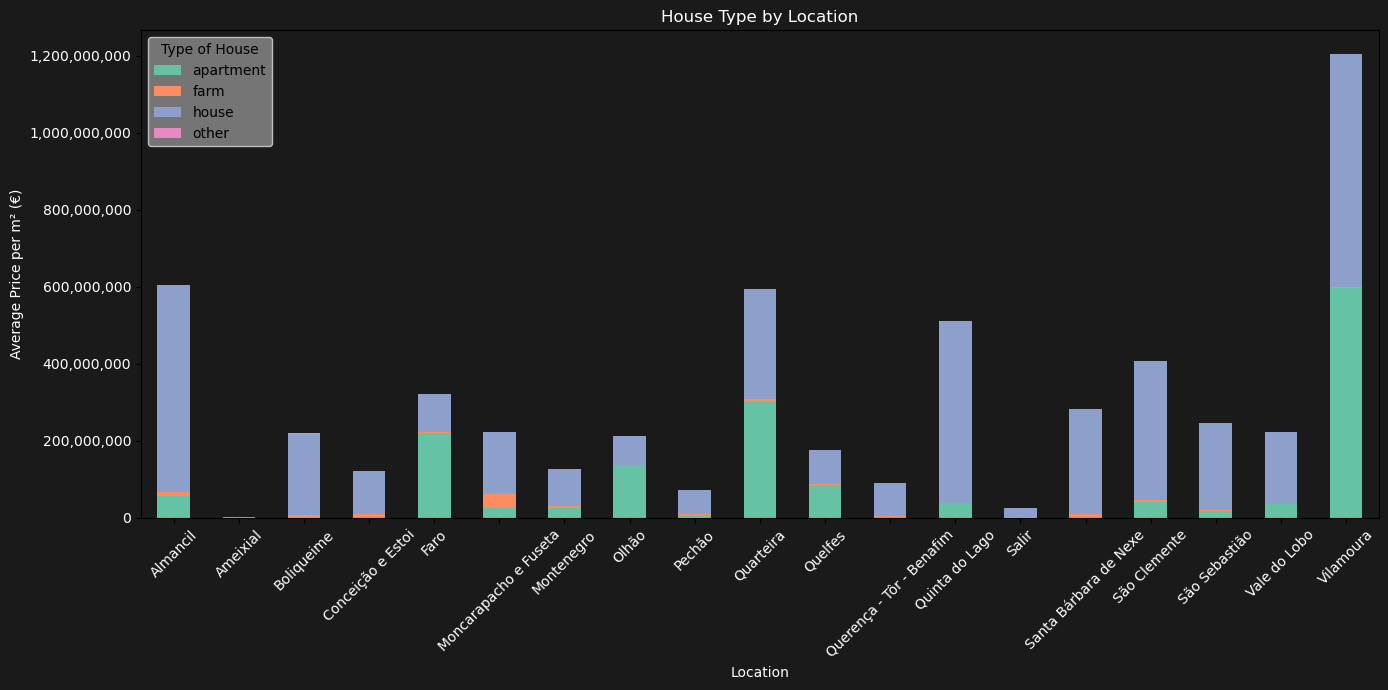

Even though houses make up slightly less than half of listings, they represent  70% of the value of the listings. This is a result of 16% higher asking price per square meter for houses (EUR 3.637) when compared with apartments (EUR 3.145). Excluding Quinta do Lago and Vale do Lobo from the dataset would yield a price difference between the two typologies of c. 5%.

In large part due to the housing market in Quinta do Lago and Vale do Lobo, as well as due to the size itself of Concelho de Loulé, the latter represents an outsized portion of total listings values within the Algarve region. Even more so, when considering the population of Concelho de Loulé and Faro is essentially the same. 

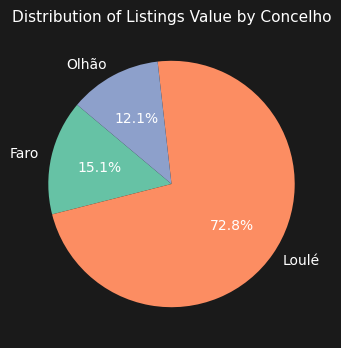
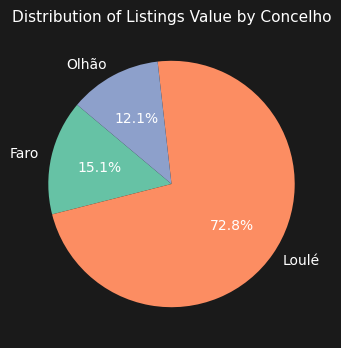


In terms of general data set quality there are two main issues:

(1) There are still some duplicates listings which are not being captured by the duplicates test, overstating the true value of listings for sale. These are listings which have very similar, yet different, characteristics. To the human eye they are obviously duplicates, but Python cannot easily detect them due to the difficulty in creating rules to eliminate these listings.

(2) There is also another issue due to the fact that there is significant activity with respect to new construction, which likely contributes to an understatement of the number of houses/apartments for sale. Often times, the project promoter does not create a listing for every single house/apartment on sale, but instead group listings by tipology or so forth.

                                                                  HOUSES                                                                                      

Houses (both semi-dettached and dettached) have a total value of EUR 3.9 billion in this dataset, spread over 2.967 listings. Around 40% of the listings' values are concentrated in three areas (by descending listing value): (1) Vilamoura (EUR 607M), (2) Almancil (EUR 537M) and, (3) Quinta do Lago (EUR 470M).

According to the data extracted from Idealista, 95% of the listing value corresponds to dettached houses. Overall, houses average 368m2 in size at an average price per square meter of EUR 3.637, with the most common tipology, by far, being houses with four-bedrooms, represting almost 35% of listing values. Furthermore, it seems that four-bedroom houses are significantly more sought-after than three-bedroom houses. This is evidenced by the similar number of listings of each variant, despite the four-bedroom variant generally having a higher average room price. 

Top 5 locations by price per square meter: 

| Location  | Price m2 |
|---------- |----------|
| Quarteira |   4.248  |
| Almancil  |   4.830  |   
| Vilamoura |   5.563  |
| VdL       |   9.249  |  
| QdL       |  12.408  |  

*VdL = Vale do Lobo*, 
*QdL = Quinta do Lago*


                                                                APARTMENTS                                                                                    
Apartments have a total value of EUR 1.6 billion in this dataset, spread over 3.027 listings. Around 70% of the listings' values are concentrated in three areas (by descending listing value): (1) Vilamoura (EUR 597M), (2) Quarteira (EUR 301M) and, (3) Faro (EUR 221).

The two-bedroom apartment is the most common of all. It represents slightly less than half of apartment listings and 46% of the value of the listings. The price per square meter of two-bedroom apartments is EUR 4.358, with generally lowering price per square meter for apartments with more rooms.

Even though the number of listings for T2 apartments are more than double the next largest tipology (T3), the apartments are still holdings a strong value per square meter. This could be due, in part, to two things: (1) most of the new construction are T2 apartments and/or (2) T2 apartaments are within apartment buyers, the most desired tipology.

When it comes to total value and listings regarding apartments, Vilamoura has both the highest number of listings at 848, as well as the highest total value of the active listings, totalling EUR 597 million. Within Concelho de Loulé & Faro, Vilamoura has the third highest price per square meter, behind Quinta do Lago at EUR 7.402 and Vale do Lobo at EUR 6.549 (excluding four listings  within the Viceroy Hotels & Resorts, located in Querença, which are currenly going for EUR 6.534).

#### 2.1 Tables for Charts

In [19]:
df_no_duplicates = df_no_duplicates.copy()

##### 2.1.1 Property Type Table

In [20]:
property_type_table = df_no_duplicates.groupby('Property_Type').agg(
    Total_Price=('Price', 'sum'),
    Total_Area=('Listing_Area', 'sum'),
    Average_Area=('Listing_Area', 'mean'),
    Number_Listings=('Price', 'count')
    
).reset_index()

property_type_table ['Average_Price_per_m2'] = property_type_table ['Total_Price'] / property_type_table ['Total_Area']

# property_type_table ['Average_Price_per_m2'] = property_type_table ['Average_Price_per_m2'].apply(lambda x: f"{x:,.0f}")
# property_type_table ['Total_Price'] = property_type_table ['Total_Price'].apply(lambda x: f"{x:,.0f}")
# property_type_table ['Number_Listings'] = property_type_table ['Number_Listings'].apply(lambda x: f"{x:,.0f}")
# property_type_table ['Total_Area'] = property_type_table ['Total_Area'].apply(lambda x: f"{x:,.0f}")
# property_type_table ['Average_Area'] = property_type_table ['Average_Area'].apply(lambda x: f"{x:,.0f}")

print(property_type_table)

  Property_Type   Total_Price  Total_Area  Average_Area  Number_Listings  Average_Price_per_m2
0       Palácio  3.057525e+08    209416.0   2204.378947               95           1460.024544
1         Solar  4.888106e+07     85371.0   1524.482143               56            572.572162
2     apartment  2.781111e+10  10106112.0    165.454266            61081           2751.909617
3          farm  3.843491e+09  20525961.0   4583.734033             4478            187.250249
4         house  3.229636e+10  34220528.0    602.209028            56825            943.771415
5         other  2.858683e+08   1102448.0   1431.750649              770            259.303247


##### 2.1.2 Specific Property Type Table

In [21]:
specific_property_type_table = df_no_duplicates.groupby('Title_Property_Type').agg(
    Total_Price=('Price', 'sum'),
    Total_Area=('Listing_Area', 'sum'),
    Average_Area=('Listing_Area', 'mean'),
    Number_Listings=('Price', 'count')
    
).reset_index()

specific_property_type_table ['Average_Price_per_m2'] = specific_property_type_table ['Total_Price'] / specific_property_type_table ['Total_Area']

# property_type_table ['Average_Price_per_m2'] = property_type_table ['Average_Price_per_m2'].apply(lambda x: f"{x:,.0f}")
# property_type_table ['Total_Price'] = property_type_table ['Total_Price'].apply(lambda x: f"{x:,.0f}")
# property_type_table ['Number_Listings'] = property_type_table ['Number_Listings'].apply(lambda x: f"{x:,.0f}")
# property_type_table ['Total_Area'] = property_type_table ['Total_Area'].apply(lambda x: f"{x:,.0f}")
# property_type_table ['Average_Area'] = property_type_table ['Average_Area'].apply(lambda x: f"{x:,.0f}")

print(specific_property_type_table)

     Title_Property_Type   Total_Price  Total_Area  Average_Area  Number_Listings  Average_Price_per_m2
0       Andar de moradia  1.528855e+08    242668.0    462.224762              525            630.019117
1         Casa de aldeia  1.548255e+08   2221259.0   1580.967260             1405             69.701672
2           Casa rústica  4.968975e+08   3424473.0   4254.003727              805            145.101902
3                Castelo  6.448500e+06    193132.0  12875.466667               15             33.389081
4                 Duplex  1.719954e+09    501255.0    196.570588             2550           3431.294513
5                Herdade  8.911325e+08   6454644.0   8285.807445              779            138.060675
6                 Moinho  1.076478e+07     15290.0    413.243243               37            704.040353
7                  Monte  1.222181e+08    844490.0   4060.048077              208            144.724141
8                Moradia  8.532809e+09   7827295.0    457.335378

##### 2.1.3 Concelho Type Table

In [22]:
concelho_table  = df_no_duplicates.groupby('Concelho').agg(
    Total_Price=('Price', 'sum'),
    Total_Area=('Listing_Area', 'sum'),
    Average_Area=('Listing_Area', 'sum'),
    Number_Listings=('Price', 'count')
).reset_index()

concelho_table['Average_Price_per_m2'] = concelho_table['Total_Price'] / concelho_table['Total_Area']

# concelho_table ['Average_Price_per_m2'] = concelho_table ['Average_Price_per_m2'].apply(lambda x: f"{x:,.0f}")
# concelho_table ['Total_Price'] = concelho_table ['Total_Price'].apply(lambda x: f"{x:,.0f}")
# concelho_table ['Number_Listings'] = concelho_table ['Number_Listings'].apply(lambda x: f"{x:,.0f}")
# concelho_table ['Total_Area'] = concelho_table ['Total_Area'].apply(lambda x: f"{x:,.0f}")
# concelho_table ['Average_Area'] = concelho_table ['Average_Area'].apply(lambda x: f"{x:,.0f}")

print(concelho_table)

                       Concelho   Total_Price  Total_Area  Average_Area  Number_Listings  Average_Price_per_m2
0                     Albufeira  1.669463e+09    840969.0      840969.0             2201           1985.166162
1                      Alcobaça  2.838855e+08    365070.0      365070.0              782            777.619341
2                     Alcochete  1.948733e+08     73965.0       73965.0              324           2634.669506
3                Alcácer do Sal  2.279886e+08    554485.0      554485.0              267            411.171718
4                      Alenquer  1.443459e+08    191669.0      191669.0              432            753.100058
5                       Aljezur  2.115498e+08    780353.0      780353.0              223            271.095054
6                      Almeirim  5.911780e+07    112942.0      112942.0              222            523.435055
7                      Alpiarça  1.272788e+07     33214.0       33214.0               53            383.208286
8

##### 2.1.4 Concelho & Property Type Table

In [23]:
concelho_property_type_table  = df_no_duplicates.groupby(['Concelho', 'Property_Type']).agg(
    Total_Price=('Price', 'sum'),
    Total_Area=('Listing_Area', 'sum'),
    Average_Area=('Listing_Area', 'sum'),
    Number_Listings=('Price', 'count')
).reset_index()

concelho_property_type_table['Average_Price_per_m2'] = concelho_property_type_table['Total_Price'] / concelho_property_type_table['Total_Area']

# concelho_table ['Average_Price_per_m2'] = concelho_table ['Average_Price_per_m2'].apply(lambda x: f"{x:,.0f}")
# concelho_table ['Total_Price'] = concelho_table ['Total_Price'].apply(lambda x: f"{x:,.0f}")
# concelho_table ['Number_Listings'] = concelho_table ['Number_Listings'].apply(lambda x: f"{x:,.0f}")
# concelho_table ['Total_Area'] = concelho_table ['Total_Area'].apply(lambda x: f"{x:,.0f}")
# concelho_table ['Average_Area'] = concelho_table ['Average_Area'].apply(lambda x: f"{x:,.0f}")

print(concelho_property_type_table)

                       Concelho Property_Type   Total_Price  Total_Area  Average_Area  Number_Listings  Average_Price_per_m2
0                     Albufeira         Solar  6.200000e+05       222.0         222.0                1           2792.792793
1                     Albufeira     apartment  4.742286e+08    129750.0      129750.0             1225           3654.940678
2                     Albufeira          farm  6.274800e+07    305504.0      305504.0               34            205.391746
3                     Albufeira         house  1.131867e+09    405493.0      405493.0              941           2791.334620
4                      Alcobaça     apartment  6.285309e+07     23598.0       23598.0              203           2663.492245
5                      Alcobaça          farm  1.307740e+07     12773.0       12773.0               19           1023.831520
6                      Alcobaça         house  2.077160e+08    328453.0      328453.0              558            632.407081


##### 2.1.5 Property Type & Title Property Type Table

In [24]:
property_type_title_property_type_table  = df_no_duplicates.groupby(['Property_Type', 'Title_Property_Type']).agg(
    Total_Price=('Price', 'sum'),
    Total_Area=('Listing_Area', 'sum'),
    Average_Area=('Listing_Area', 'sum'),
    Number_Listings=('Price', 'count')
).reset_index()

property_type_title_property_type_table['Average_Price_per_m2'] = property_type_title_property_type_table['Total_Price'] / property_type_title_property_type_table['Total_Area']

# concelho_table ['Average_Price_per_m2'] = concelho_table ['Average_Price_per_m2'].apply(lambda x: f"{x:,.0f}")
# concelho_table ['Total_Price'] = concelho_table ['Total_Price'].apply(lambda x: f"{x:,.0f}")
# concelho_table ['Number_Listings'] = concelho_table ['Number_Listings'].apply(lambda x: f"{x:,.0f}")
# concelho_table ['Total_Area'] = concelho_table ['Total_Area'].apply(lambda x: f"{x:,.0f}")
# concelho_table ['Average_Area'] = concelho_table ['Average_Area'].apply(lambda x: f"{x:,.0f}")

print(property_type_title_property_type_table)

   Property_Type   Title_Property_Type   Total_Price  Total_Area  Average_Area  Number_Listings  Average_Price_per_m2
0        Palácio               Palácio  3.057525e+08    209416.0      209416.0               95           1460.024544
1          Solar                 Solar  4.888106e+07     85371.0       85371.0               56            572.572162
2      apartment                Duplex  1.719954e+09    501255.0      501255.0             2550           3431.294513
3      apartment             Penthouse  8.087783e+08    177866.0      177866.0              761           4547.121226
4      apartment                    T0  4.357021e+08     98221.0       98221.0             1875           4435.936582
5      apartment                    T1  2.591140e+09    683703.0      683703.0             8880           3789.861482
6      apartment                    T2  8.047826e+09   3380245.0     3380245.0            21450           2380.841024
7      apartment                    T3  9.494103e+09   3

##### 2.1.6 Apartments Table

In [25]:
property_variable = "apartment"
apartment_property_type_table = df_no_duplicates[df_no_duplicates['Property_Type'] == property_variable]

apartment_property_type_table.head(4)

,Title,Price,Type,Area,Floor,URL,Unique Key,Tipo Construção,Location_1,Location_2,Location_3,Location_4,Concelho,Distrito,Title_Property_Type,Property_Type,Number_of_Rooms,Listing_Area
0,"Apartamento T2 na rua da Liberdade, 19, Carreg...",199000.0,T2,117 m² área bruta,3º andar com elevador,https://www.idealista.pt/comprar-casas/alenquer/,"Apartamento T2 na rua da Liberdade, 19, Carreg...",.,alenquer,,NaN,NaN,Alenquer,Lisboa,T2,apartment,2,117.0
5,Apartamento T2 na praceta Pedro Álvares Cabral...,170000.0,T2,125 m² área bruta,3º andar com elevador,https://www.idealista.pt/comprar-casas/alenquer/,Apartamento T2 na praceta Pedro Álvares Cabral...,.,alenquer,,NaN,NaN,Alenquer,Lisboa,T2,apartment,2,125.0
6,"Apartamento T3 na rua Nuno Tristão, Carregado ...",195000.0,T3,158 m² área bruta,Rés do chão sem elevador,https://www.idealista.pt/comprar-casas/alenquer/,"Apartamento T3 na rua Nuno Tristão, Carregado ...",.,alenquer,,NaN,NaN,Alenquer,Lisboa,T3,apartment,3,158.0
7,"Apartamento T2 em Carregado e Cadafais, Alenquer,",165000.0,T2,87 m² área bruta,5º andar com elevador,https://www.idealista.pt/comprar-casas/alenquer/,"Apartamento T2 em Carregado e Cadafais, Alenqu...",.,alenquer,,NaN,NaN,Alenquer,Lisboa,T2,apartment,2,87.0


##### 2.1.7 Houses Table

In [26]:
property_variable = "house"
house_property_type_table = df_no_duplicates[df_no_duplicates['Property_Type'] == property_variable]

house_property_type_table.head(4)

,Title,Price,Type,Area,Floor,URL,Unique Key,Tipo Construção,Location_1,Location_2,Location_3,Location_4,Concelho,Distrito,Title_Property_Type,Property_Type,Number_of_Rooms,Listing_Area
1,"Moradia independente, quinta Alenquer, Alenquer,",3500000.0,T14,1.475 m² área bruta,0,https://www.idealista.pt/comprar-casas/alenquer/,"Moradia independente, quinta Alenquer, Alenque...",.,alenquer,,NaN,NaN,Alenquer,Lisboa,Moradia independente,house,14,1475.0
2,"Moradia independente na rua Principal, 30, Abr...",250000.0,T5,305 m² área bruta,0,https://www.idealista.pt/comprar-casas/alenquer/,"Moradia independente na rua Principal, 30, Abr...",.,alenquer,,NaN,NaN,Alenquer,Lisboa,Moradia independente,house,5,305.0
3,Moradia em Aldeia Galega da Merceana e Aldeia ...,180000.0,T2,210 m² área bruta,0,https://www.idealista.pt/comprar-casas/alenquer/,Moradia em Aldeia Galega da Merceana e Aldeia ...,.,alenquer,,NaN,NaN,Alenquer,Lisboa,Moradia,house,2,210.0
4,"Moradia independente em Alenquer,",1100000.0,T5,622 m² área bruta,0,https://www.idealista.pt/comprar-casas/alenquer/,"Moradia independente em Alenquer,1.100.000T562...",.,alenquer,,NaN,NaN,Alenquer,Lisboa,Moradia independente,house,5,622.0


##### 2.1.8 Distrito Table

In [27]:
distrito_table  = df_no_duplicates.groupby('Distrito').agg(
    Total_Price=('Price', 'sum'),
    Total_Area=('Listing_Area', 'sum'),
    Average_Area=('Listing_Area', 'sum'),
    Number_Listings=('Price', 'count')
).reset_index()

distrito_table['Average_Price_per_m2'] = distrito_table['Total_Price'] / distrito_table['Total_Area']

# concelho_table ['Average_Price_per_m2'] = concelho_table ['Average_Price_per_m2'].apply(lambda x: f"{x:,.0f}")
# concelho_table ['Total_Price'] = concelho_table ['Total_Price'].apply(lambda x: f"{x:,.0f}")
# concelho_table ['Number_Listings'] = concelho_table ['Number_Listings'].apply(lambda x: f"{x:,.0f}")
# concelho_table ['Total_Area'] = concelho_table ['Total_Area'].apply(lambda x: f"{x:,.0f}")
# concelho_table ['Average_Area'] = concelho_table ['Average_Area'].apply(lambda x: f"{x:,.0f}")

print(distrito_table)

            Distrito   Total_Price  Total_Area  Average_Area  Number_Listings  Average_Price_per_m2
0             Aveiro  1.849422e+09   2659601.0     2659601.0             5421            695.375757
1               Beja  6.835575e+08   7503581.0     7503581.0             1703             91.097503
2              Braga  2.506128e+09   2968997.0     2968997.0             6887            844.099140
3           Bragança  1.906745e+08    714011.0      714011.0              923            267.047047
4     Castelo Branco  4.429422e+08   2667348.0     2667348.0             2669            166.060901
5            Coimbra  1.069352e+09   2237527.0     2237527.0             4334            477.917020
6               Faro  1.271510e+10   6846917.0     6846917.0            16673           1857.054990
7             Guarda  1.680932e+08   2854210.0     2854210.0             1082             58.893080
8             Leiria  2.070796e+09   2218819.0     2218819.0             6085            933.287523


#### 2.2 Number of Listings

In [28]:
number_listings_incl_dups = len(df)
number_listings = len(df_no_duplicates)

print(number_listings_incl_dups)
print(number_listings)

158355
123311


#### 2.3 Value of Listings

In [29]:
total_price = df_no_duplicates["Price"].sum()
formatted_total_price = "{:,.0f}".format(total_price)
print(f"Total Price of Listings on Idealista is EUR {formatted_total_price}")

Total Price of Listings on Idealista is EUR 64,598,926,153


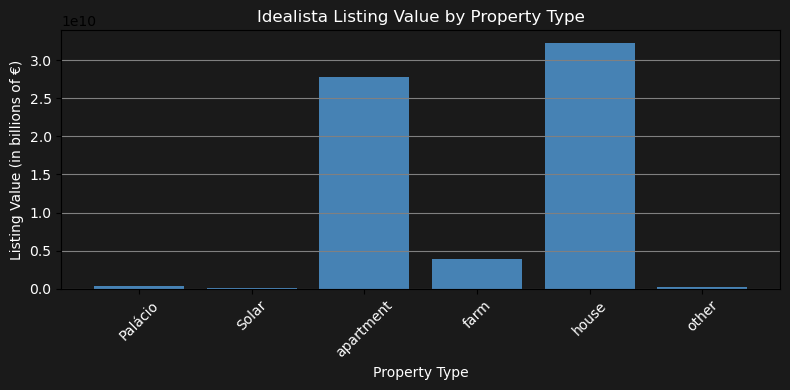

The average price per m2 on Idealista is EUR 975.0
  Property_Type     Total_Price  Total_Area Average_Area Number_Listings Average_Price_per_m2
0       Palácio     305,752,500     209,416        2,204              95                1,460
1         Solar      48,881,058      85,371        1,524              56                  573
2     apartment  27,811,106,808  10,106,112          165          61,081                2,752
3          farm   3,843,491,314  20,525,961        4,584           4,478                  187
4         house  32,296,356,127  34,220,528          602          56,825                  944
5         other     285,868,346   1,102,448        1,432             770                  259


In [30]:
pd.set_option('display.width', 1000)   

plt.figure(figsize=(8, 4))

plt.bar(property_type_table ['Property_Type'], property_type_table ['Total_Price'], color='#4682B4')

# Set background color to dark grey
plt.gcf().set_facecolor('#1A1A1A')  # Set the figure background color
plt.gca().set_facecolor('#1A1A1A')  # Set the axes background color

plt.title(f'Idealista Listing Value by Property Type', fontsize=12, color='white')
plt.xlabel('Property Type', fontsize=10, color='white')
plt.ylabel('Listing Value (in billions of €)', fontsize=10, color='white')
plt.xticks(rotation=45, color='white')  # Rotate x labels for better readability
plt.yticks(color='white')  # Set y ticks color to white
plt.grid(axis='y', color='grey')  # Add gridlines in grey for better visibility

plt.tight_layout()
plt.show()

idealista_price_per_m2 = property_type_table ['Total_Price'].sum() / property_type_table ['Total_Area'].sum()
idealista_price_per_m2_formatted = f"{idealista_price_per_m2:,.1f}"

property_type_table ['Average_Price_per_m2'] = property_type_table ['Total_Price'] / property_type_table ['Total_Area']

property_type_table ['Average_Price_per_m2'] = property_type_table ['Average_Price_per_m2'].apply(lambda x: f"{x:,.0f}")
property_type_table ['Total_Price'] = property_type_table ['Total_Price'].apply(lambda x: f"{x:,.0f}")
property_type_table ['Number_Listings'] = property_type_table ['Number_Listings'].apply(lambda x: f"{x:,.0f}")
property_type_table ['Total_Area'] = property_type_table ['Total_Area'].apply(lambda x: f"{x:,.0f}")
property_type_table ['Average_Area'] = property_type_table ['Average_Area'].apply(lambda x: f"{x:,.0f}")

print(f"The average price per m2 on Idealista is EUR {idealista_price_per_m2_formatted}")
print(property_type_table )

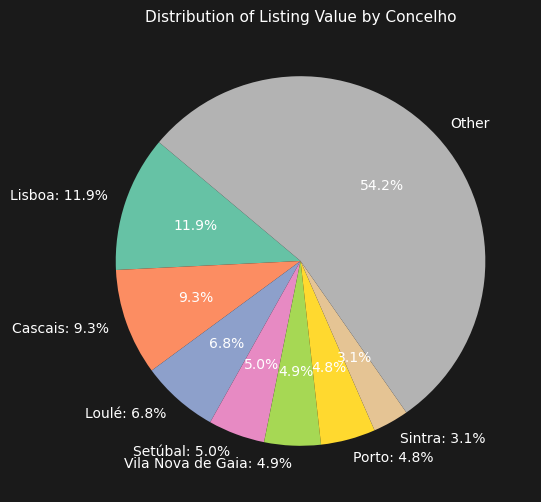

In [31]:
sorted_concelhos = concelho_table.sort_values(by='Total_Price', ascending=False)

top_7_concelhos = sorted_concelhos.head(7)

# Calculate the sum of Total_Price for the remaining Concelhos
other_concelhos_total = sorted_concelhos.iloc[7:]['Total_Price'].sum()

# Create a new DataFrame for the "Other" category
other_category = pd.DataFrame({'Concelho': ['Other'], 'Total_Price': [other_concelhos_total]})

# Concatenate the top 7 Concelhos with the "Other" category
final_data = pd.concat([top_7_concelhos, other_category], ignore_index=True)

plt.figure(figsize=(10, 6))
plt.gcf().set_facecolor('#1A1A1A')  # Set the figure background to black
plt.gca().set_facecolor('#1A1A1A')  # Set the axes background to black

# Define labels and ensure only top 7 have names
labels = [f"{name}: {percent:.1f}%" if name != 'Other' else 'Other' for name, percent in zip(final_data['Concelho'], 100 * final_data['Total_Price'] / final_data['Total_Price'].sum())]

plt.pie(
    final_data['Total_Price'],
    labels=labels,
    autopct='%1.1f%%',
    colors=plt.cm.Set2.colors,
    startangle=140,
    textprops={'color': 'white'}  # Set text color to white for better contrast
)

plt.title('Distribution of Listing Value by Largest Concelho', color='white', fontsize=11)
plt.show()

# The pie chart below shows all Concelhos
    # # Plotting the pie chart
    # plt.figure(figsize=(6, 4))
    # plt.gcf().set_facecolor('#1A1A1A')  # Set the figure background to black
    # plt.gca().set_facecolor('#1A1A1A')  # Set the axes background to black
    # plt.pie(
    #     concelho_table['Total_Price'],
    #     labels=concelho_table['Concelho'],
    #     autopct='%1.1f%%',
    #     colors=plt.cm.Set2.colors,
    #     startangle=140,
    #     textprops={'color': 'white'}  # Set text color to white for better contrast
    # )

    # plt.title('Distribution of Listings Value by Concelho', color='white', fontsize=11)
    # plt.show()

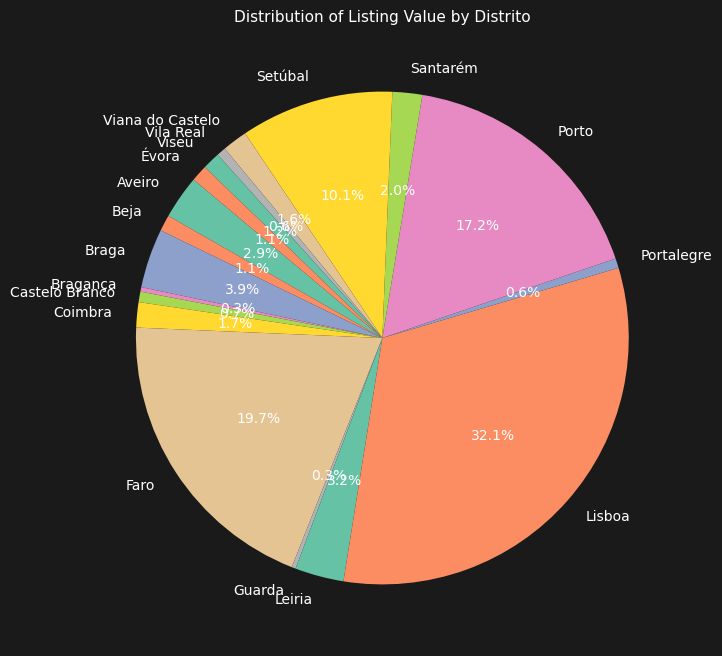

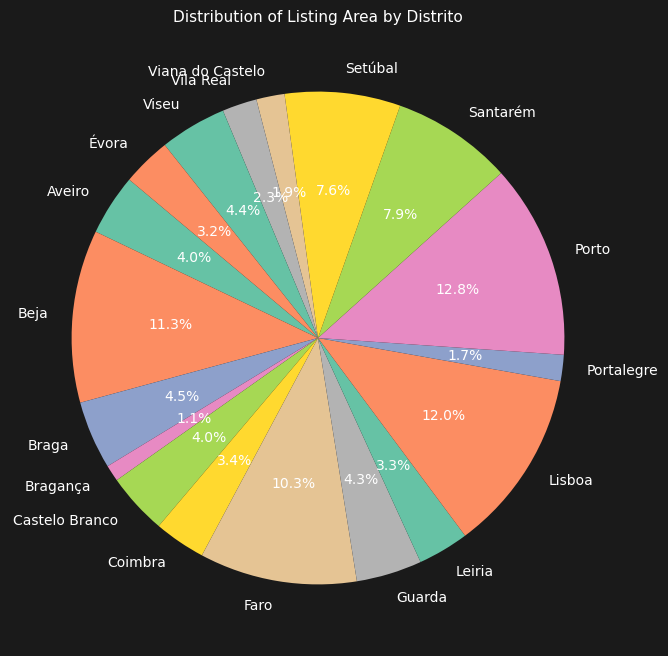

In [32]:
plt.figure(figsize=(12, 8))
plt.gcf().set_facecolor('#1A1A1A')  # Set the figure background to black
plt.gca().set_facecolor('#1A1A1A')  # Set the axes background to black

plt.pie(
    distrito_table['Total_Price'],
    labels=distrito_table['Distrito'],
    autopct='%1.1f%%',
    colors=plt.cm.Set2.colors,
    startangle=140,
    textprops={'color': 'white'}  # Set text color to white for better contrast
)

plt.title('Distribution of Listing Value by Distrito', color='white', fontsize=11)
plt.show()

plt.figure(figsize=(12, 8))
plt.gcf().set_facecolor('#1A1A1A')  # Set the figure background to black
plt.gca().set_facecolor('#1A1A1A')  # Set the axes background to black

plt.pie(
    distrito_table['Total_Area'],
    labels=distrito_table['Distrito'],
    autopct='%1.1f%%',
    colors=plt.cm.Set2.colors,
    startangle=140,
    textprops={'color': 'white'}  # Set text color to white for better contrast
)

plt.title('Distribution of Listing Area by Distrito', color='white', fontsize=11)
plt.show()

In [33]:
df_distrito_population = pd.read_csv(
    "Distrito_Population.csv",
    sep=";",
    header=0,
    encoding="utf-8",
    quotechar='"',
)

df_distrito_population.head(20)

distrito_table

df_distrito_population_per_capita = pd.merge(df_distrito_population, distrito_table, on='Distrito')

df_distrito_population_per_capita["Listing_Value_per_Capita"] = df_distrito_population_per_capita["Total_Price"] / df_distrito_population_per_capita["Population"]

df_distrito_population_per_capita_sorted = df_distrito_population_per_capita.sort_values(by='Listing_Value_per_Capita', ascending=False)

df_distrito_population_per_capita_sorted["Population"] = df_distrito_population_per_capita_sorted["Population"].apply(lambda x: f"{x:,.0f}")
df_distrito_population_per_capita_sorted["Total_Price"] = df_distrito_population_per_capita_sorted["Total_Price"].apply(lambda x: f"{x:,.0f}")
df_distrito_population_per_capita_sorted["Number_Listings"] = df_distrito_population_per_capita_sorted["Number_Listings"].apply(lambda x: f"{x:,.0f}")
df_distrito_population_per_capita_sorted["Average_Price_per_m2"] = df_distrito_population_per_capita_sorted["Average_Price_per_m2"].apply(lambda x: f"{x:,.0f}")
df_distrito_population_per_capita_sorted["Listing_Value_per_Capita"] = df_distrito_population_per_capita_sorted["Listing_Value_per_Capita"].apply(lambda x: f"{x:,.0f}")

df_distrito_population_per_capita_sorted = df_distrito_population_per_capita_sorted.drop(columns=['Total_Area', 'Average_Area'])

print(df_distrito_population_per_capita_sorted)

            Distrito Population     Total_Price Number_Listings Average_Price_per_m2 Listing_Value_per_Capita
5               Faro    472,000  12,715,101,379          16,673                1,857                   26,939
0             Lisboa  2,301,904  20,748,788,267          25,901                2,607                    9,014
2            Setúbal    887,928   6,493,886,467          12,189                1,292                    7,314
1              Porto  1,819,515  11,094,430,116          23,643                1,313                    6,097
14              Beja    146,725     683,557,489           1,703                   91                    4,659
10  Viana do Castelo    232,220   1,061,866,558           3,418                  865                    4,573
13             Évora    152,853     696,360,941           1,662                  328                    4,556
6             Leiria    467,139   2,070,796,089           6,085                  933                    4,433
17        

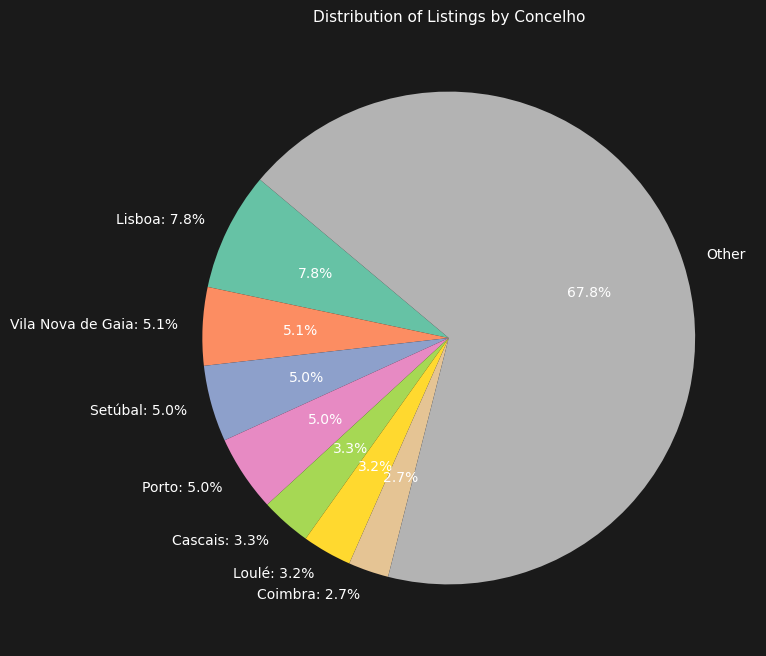

In [34]:
sorted_concelhos = concelho_table.sort_values(by='Number_Listings', ascending=False)

top_7_concelhos = sorted_concelhos.head(7)

# Calculate the sum of Total_Price for the remaining Concelhos
other_concelhos_total = sorted_concelhos.iloc[7:]['Number_Listings'].sum()

# Create a new DataFrame for the "Other" category
other_category = pd.DataFrame({'Concelho': ['Other'], 'Number_Listings': [other_concelhos_total]})

# Concatenate the top 7 Concelhos with the "Other" category
final_data = pd.concat([top_7_concelhos, other_category], ignore_index=True)

plt.figure(figsize=(12, 8))
plt.gcf().set_facecolor('#1A1A1A')  # Set the figure background to black
plt.gca().set_facecolor('#1A1A1A')  # Set the axes background to black

# Define labels and ensure only top 7 have names
labels = [f"{name}: {percent:.1f}%" if name != 'Other' else 'Other' for name, percent in zip(final_data['Concelho'], 100 * final_data['Number_Listings'] / final_data['Number_Listings'].sum())]

plt.pie(
    final_data['Number_Listings'],
    labels=labels,
    autopct='%1.1f%%',
    colors=plt.cm.Set2.colors,
    startangle=140,
    textprops={'color': 'white'}  # Set text color to white for better contrast
)

plt.title('Distribution of Listings by Concelho', color='white', fontsize=11)
plt.show()

# The pie chart below shows all Concelhos
    # plt.figure(figsize=(6,4))
    # plt.gcf().set_facecolor('#1A1A1A')
    # plt.gca().set_facecolor('#1A1A1A')
    # plt.pie(
    #     concelho_table['Number_Listings'],
    #     labels=concelho_table['Concelho'],
    #     autopct='%1.1f%%',
    #     colors=plt.cm.Set2.colors,
    #     startangle=140,
    #     textprops={'color':'white'}
    # )

    # plt.title('Distribution of the Number of Listings by Concelho', color='white', fontsize=11)
    # plt.show()

#### 2.4 Largest Property Type by Value and Nº of Listings

In [35]:
pd.set_option('display.width', 1000)

property_type_table_1 = property_type_table.copy()

total_sum = property_type_table_1['Total_Price'].sum()

property_type_table_1['Per_of_Total'] = property_type_table_1['Total_Price'] / total_sum * 100

property_type_table_1['Total_Price'] = property_type_table_1['Total_Price'].apply(lambda x: f"{x:,.0f}")
property_type_table_1['Total_Area'] = property_type_table_1['Total_Area'].apply(lambda x: f"{x:,.0f}")
property_type_table_1['Average_Area'] = property_type_table_1['Average_Area'].apply(lambda x: f"{x:,.0f}")
property_type_table_1['Number_Listings'] = property_type_table_1['Number_Listings'].apply(lambda x: f"{x:,.0f}")
property_type_table_1['Average_Price_per_m2'] = property_type_table_1['Average_Price_per_m2'].apply(lambda x: f"{x:,.0f}")
property_type_table_1['Per_of_Total'] = property_type_table_1['Per_of_Total'].apply(lambda x: f"{x:.2f}%")

print("Property Type by % of Total Value:")
print(property_type_table_1)

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [79]:
pd.set_option('display.width', 1000)

property_type_table_2 = property_type_table.copy()

total_sum_listings = property_type_table['Number_Listings'].sum()

property_type_table_2['Per_of_Total'] = property_type_table_2['Number_Listings'] / total_sum_listings * 100

property_type_table_2['Total_Price'] = property_type_table_2['Total_Price'].apply(lambda x: f"{x:,.0f}")
property_type_table_2['Total_Area'] = property_type_table_2['Total_Area'].apply(lambda x: f"{x:,.0f}")
property_type_table_2['Average_Area'] = property_type_table_2['Average_Area'].apply(lambda x: f"{x:,.0f}")
property_type_table_2['Number_Listings'] = property_type_table_2['Number_Listings'].apply(lambda x: f"{x:,.0f}")
property_type_table_2['Average_Price_per_m2'] = property_type_table_2['Average_Price_per_m2'].apply(lambda x: f"{x:,.0f}")
property_type_table_2['Per_of_Total'] = property_type_table_2['Per_of_Total'].apply(lambda x: f"{x:.2f}%")

print("Property Type by % of Total Listings:")
print(property_type_table_2)

Property Type by % of Total Listings:
  Property_Type     Total_Price  Total_Area Average_Area Number_Listings Average_Price_per_m2 Per_of_Total
0       Palácio     305,752,500     209,416        2,204              95                1,460        0.08%
1         Solar      48,881,058      85,371        1,524              56                  573        0.05%
2     apartment  27,811,106,808  10,106,112          165          61,081                2,752       49.54%
3          farm   3,843,491,314  20,525,961        4,584           4,478                  187        3.63%
4         house  32,296,356,127  34,220,528          602          56,825                  944       46.08%
5         other     285,868,346   1,102,448        1,432             770                  259        0.62%


In [80]:
pd.set_option('display.width', 1000)

# Calculating Average Price per m2
concelho_table['Average_Price_per_m2'] = concelho_table['Total_Price'] / concelho_table['Total_Area']

# Formatting numbers
concelho_table['Total_Price'] = concelho_table['Total_Price'].apply(lambda x: f"{x:,.0f}")
concelho_table['Total_Area'] = concelho_table['Total_Area'].apply(lambda x: f"{x:,.0f}")
concelho_table['Average_Area'] = concelho_table['Average_Area'].apply(lambda x: f"{x:,.0f}")
concelho_table['Average_Price_per_m2'] = concelho_table['Average_Price_per_m2'].apply(lambda x: f"{x:,.0f}")
concelho_table['Number_Listings'] = concelho_table['Number_Listings'].apply(lambda x: f"{x:,.0f}")

print(concelho_table)

concelho_table['Total_Price'] = pd.to_numeric(concelho_table['Total_Price'].str.replace(",", ""), errors='coerce')
concelho_table['Total_Area'] = pd.to_numeric(concelho_table['Total_Area'].str.replace(",", ""), errors='coerce')
concelho_table['Average_Area'] = pd.to_numeric(concelho_table['Average_Area'].str.replace(",", ""), errors='coerce')
concelho_table['Average_Price_per_m2'] = pd.to_numeric(concelho_table['Average_Price_per_m2'].str.replace(",", ""), errors='coerce')
concelho_table['Number_Listings'] = pd.to_numeric(concelho_table['Number_Listings'].str.replace(",", ""), errors='coerce')

                       Concelho    Total_Price Total_Area Average_Area Number_Listings Average_Price_per_m2
0                     Albufeira  1,669,463,202    840,969      840,969           2,201                1,985
1                      Alcobaça    283,885,493    365,070      365,070             782                  778
2                     Alcochete    194,873,330     73,965       73,965             324                2,635
3                Alcácer do Sal    227,988,550    554,485      554,485             267                  411
4                      Alenquer    144,345,935    191,669      191,669             432                  753
5                       Aljezur    211,549,839    780,353      780,353             223                  271
6                      Almeirim     59,117,802    112,942      112,942             222                  523
7                      Alpiarça     12,727,880     33,214       33,214              53                  383
8                       Amad

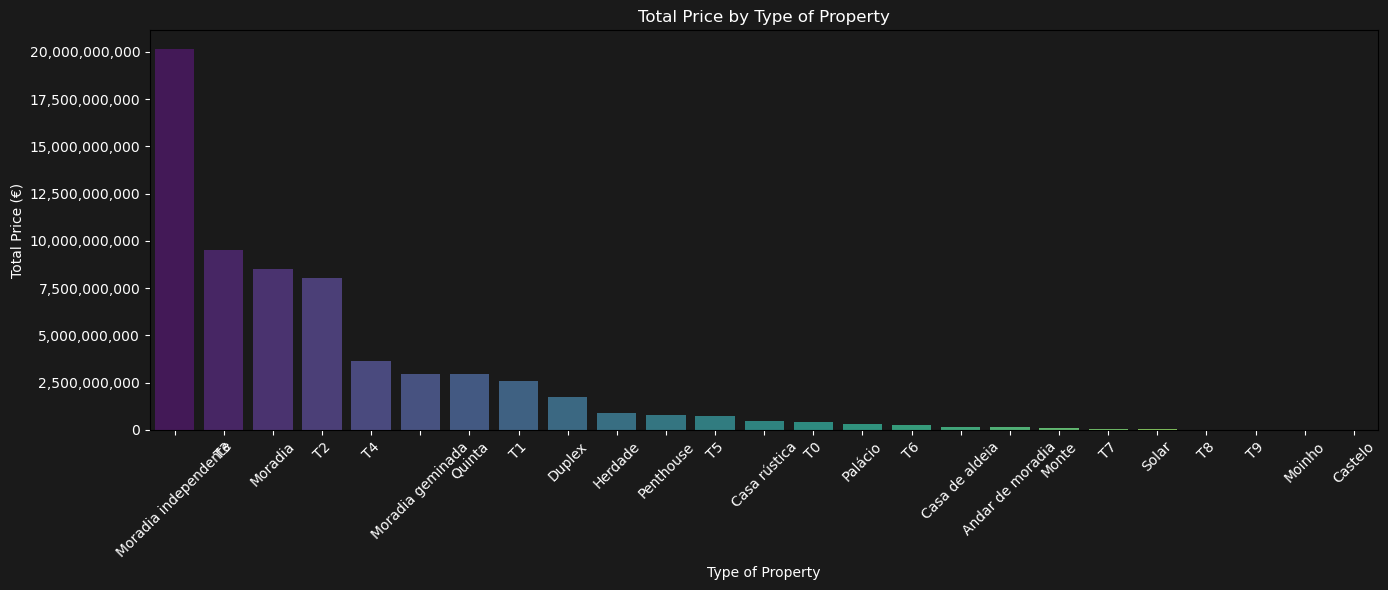

In [81]:
property_type_table_sorted_price = specific_property_type_table.copy()
property_type_table_sorted_price = property_type_table_sorted_price.sort_values(by='Total_Price', ascending=False)

fig, ax = plt.subplots(figsize=(14, 6))

# Set the background color to dark grey
fig.patch.set_facecolor('#1A1A1A')
ax.set_facecolor('#1A1A1A')

sns.barplot(x='Title_Property_Type', hue='Title_Property_Type', y='Total_Price', data=property_type_table_sorted_price, palette='viridis', ax=ax, legend=False)
ax.set_title('Total Price by Type of Property', color='white')
ax.set_xlabel('Type of Property', color='white')
ax.set_ylabel('Total Price (€)', color='white')
ax.tick_params(axis='x', colors='white', rotation=45)
ax.tick_params(axis='y', colors='white')

# Format the y-axis with thousand separators
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.tight_layout()
plt.show()

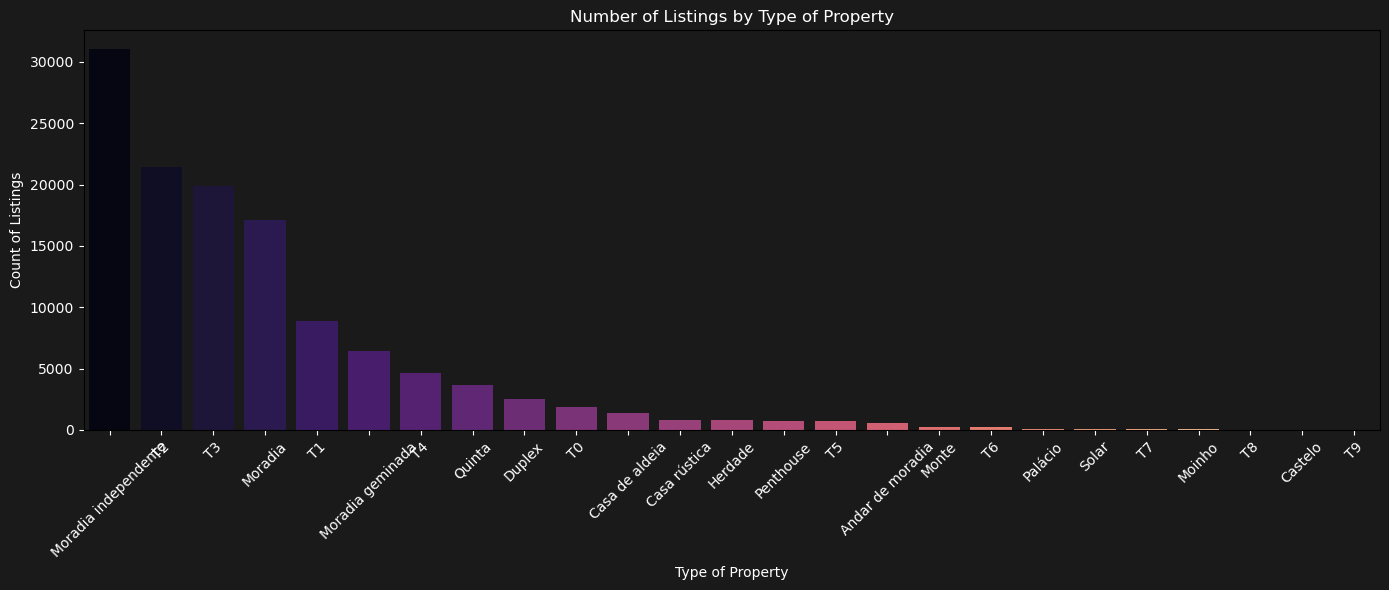

In [82]:
property_type_table_sorted_listings = specific_property_type_table.copy()
property_type_table_sorted_listings = property_type_table_sorted_listings.sort_values(by='Number_Listings', ascending=False)

# Plotting the count of listings for each type with a dark grey background
fig, ax = plt.subplots(figsize=(14, 6))

# Set the background color to dark grey
fig.patch.set_facecolor('#1A1A1A')
ax.set_facecolor('#1A1A1A')

# Plotting
sns.barplot(x='Title_Property_Type', hue='Title_Property_Type', y='Number_Listings', data=property_type_table_sorted_listings, palette='magma', ax=ax, legend=False)
ax.set_title('Number of Listings by Type of Property', color='white')
ax.set_xlabel('Type of Property', color='white')
ax.set_ylabel('Count of Listings', color='white')
ax.tick_params(axis='x', colors='white', rotation=45)
ax.tick_params(axis='y', colors='white')

plt.tight_layout()
plt.show()

#### 2.5 Info by Location

/var/folders/cz/_h2n4h2x32bb7q77mgqn9jr80000gn/T/ipykernel_22086/2276542614.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_distrito_distribution['LogPrice'] = np.log(df_distrito_distribution['Average_Price_per_m2'].replace(0, np.nan))  # Replace 0 values to avoid log(0) issues


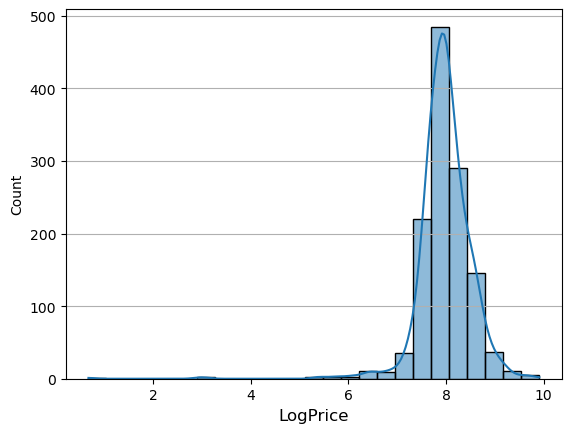

In [61]:
df_no_duplicates["Average_Price_per_m2"] = df_no_duplicates["Price"] / df_no_duplicates["Listing_Area"]

var1 = "Olhão"
df_distrito_distribution = df_no_duplicates[df_no_duplicates["Concelho"] == var1]

# # Apply a log transformation to the 'Price' column to reduce skewness
df_distrito_distribution['LogPrice'] = np.log(df_distrito_distribution['Average_Price_per_m2'].replace(0, np.nan))  # Replace 0 values to avoid log(0) issues

# # Create the plot
fig, ax = plt.subplots()

# # Plot the histogram with log-transformed price
sns.histplot(data=df_distrito_distribution['LogPrice'], bins=25, kde=True, ax=ax)

# # Set grid and labels
ax.yaxis.grid(True)
ax.xaxis.label.set_size(12)

plt.show()

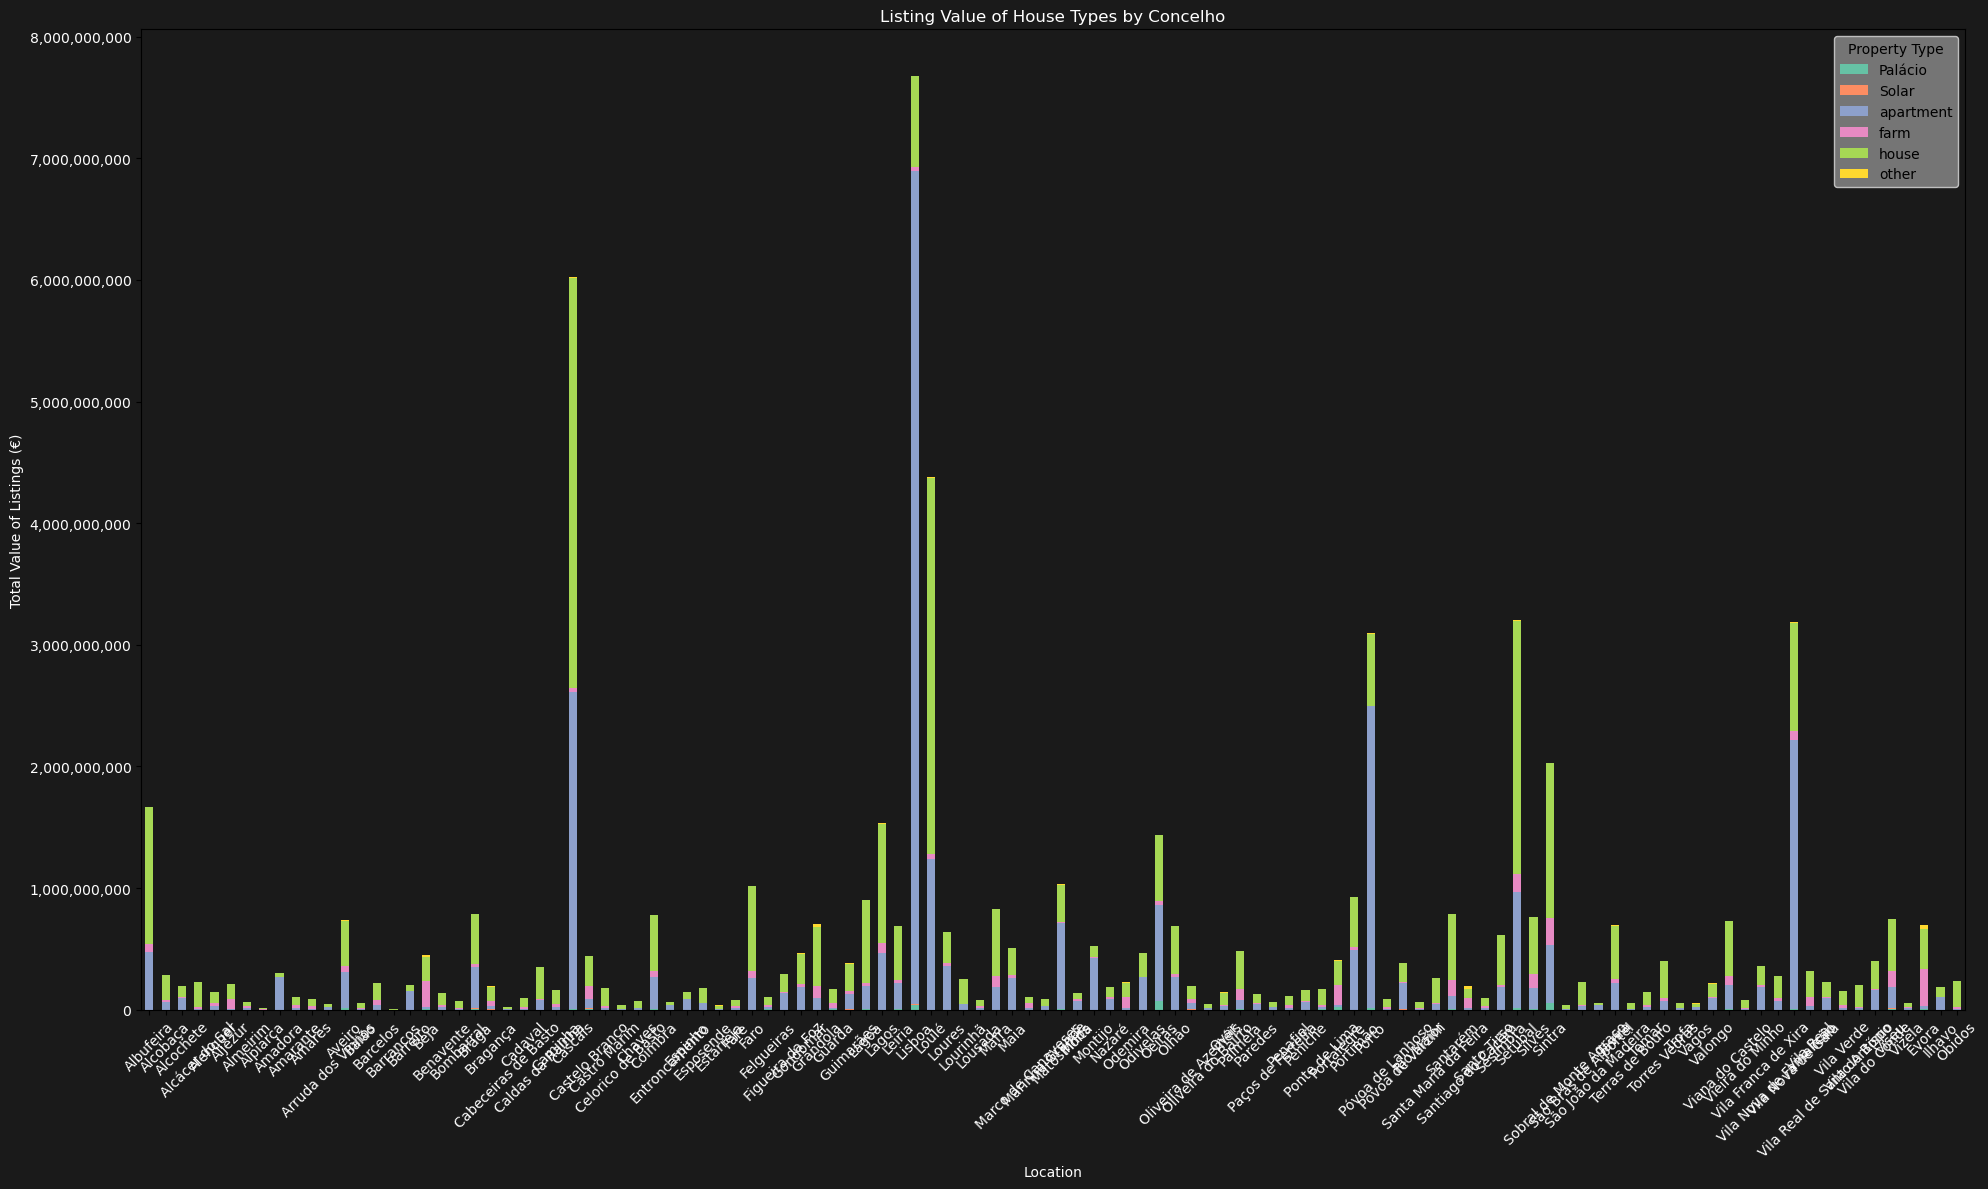

                       Concelho Property_Type    Total_Price Total_Area Average_Area Number_Listings Average_Price_per_m2
0                     Albufeira         Solar        620,000        222          222               1                2,793
1                     Albufeira     apartment    474,228,553    129,750      129,750           1,225                3,655
2                     Albufeira          farm     62,748,000    305,504      305,504              34                  205
3                     Albufeira         house  1,131,866,649    405,493      405,493             941                2,791
4                      Alcobaça     apartment     62,853,090     23,598       23,598             203                2,663
5                      Alcobaça          farm     13,077,400     12,773       12,773              19                1,024
6                      Alcobaça         house    207,716,003    328,453      328,453             558                  632
7                      A

In [84]:
pivot_data = concelho_property_type_table.pivot(index='Concelho', columns='Property_Type', values='Total_Price').fillna(0)

# Set a color palette
color_palette = sns.color_palette("Set2", n_colors=pivot_data.shape[1])  # Adjust the palette as needed

plt.figure(figsize=(20, 12))

# Set the background color to dark grey
plt.gca().set_facecolor('#1A1A1A')
plt.gcf().set_facecolor('#1A1A1A')

# Create the stacked bar plot
pivot_data.plot(kind='bar', stacked=True, ax=plt.gca(), color=color_palette)

plt.title('Listing Value of House Types by Concelho', color='white')
plt.xlabel('Location', color='white')
plt.ylabel('Total Value of Listings (€)', color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')

# Format the y-axis with thousand separators
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Show the plot
plt.tight_layout()
plt.legend(title='Property Type', facecolor='grey', framealpha=0.9)
plt.show()

concelho_property_type_table['Total_Price'] = concelho_property_type_table['Total_Price'].apply(lambda x: f"{x:,.0f}")
concelho_property_type_table['Total_Area'] = concelho_property_type_table['Total_Area'].apply(lambda x: f"{x:,.0f}")
concelho_property_type_table['Average_Area'] = concelho_property_type_table['Average_Area'].apply(lambda x: f"{x:,.0f}")
concelho_property_type_table['Number_Listings'] = concelho_property_type_table['Number_Listings'].apply(lambda x: f"{x:,.0f}")
concelho_property_type_table['Average_Price_per_m2'] = concelho_property_type_table['Average_Price_per_m2'].apply(lambda x: f"{x:,.0f}")

print(concelho_property_type_table)

concelho_property_type_table['Total_Price'] = pd.to_numeric(concelho_property_type_table['Total_Price'].str.replace(",", ""), errors='coerce')
concelho_property_type_table['Total_Area'] = pd.to_numeric(concelho_property_type_table['Total_Area'].str.replace(",", ""), errors='coerce')
concelho_property_type_table['Average_Area'] = pd.to_numeric(concelho_property_type_table['Average_Area'].str.replace(",", ""), errors='coerce')
concelho_property_type_table['Number_Listings'] = pd.to_numeric(concelho_property_type_table['Number_Listings'].str.replace(",", ""), errors='coerce')
concelho_property_type_table['Average_Price_per_m2'] = pd.to_numeric(concelho_property_type_table['Average_Price_per_m2'].str.replace(",", ""), errors='coerce')

#### 2.6 Info by Type & Location

##### 2.6.1 Apartments Analysis

In [85]:
apartment_property_type_table_1 = apartment_property_type_table.groupby('Concelho').agg(
    Total_Price=('Price', 'sum'),
    Number_Listings=('Price', 'count'),
    Total_Area=('Listing_Area', 'sum')
)

apartment_property_type_table_1["Average_Price_per_m2"] = apartment_property_type_table_1["Total_Price"] / apartment_property_type_table_1["Total_Area"]

apartment_property_type_table_1 = apartment_property_type_table_1.sort_values(by="Total_Price", ascending=False)

apartment_property_type_table_1['Total_Price'] = apartment_property_type_table_1['Total_Price'].apply(lambda x: f"{x:,.0f}")
apartment_property_type_table_1['Number_Listings'] = apartment_property_type_table_1['Number_Listings'].apply(lambda x: f"{x:,.0f}")
apartment_property_type_table_1['Total_Area'] = apartment_property_type_table_1['Total_Area'].apply(lambda x: f"{x:,.0f}")
apartment_property_type_table_1['Average_Price_per_m2'] = apartment_property_type_table_1['Average_Price_per_m2'].apply(lambda x: f"{x:,.0f}")

print(apartment_property_type_table_1)

apartment_property_type_table_1['Total_Price'] = pd.to_numeric(apartment_property_type_table_1['Total_Price'].str.replace(",", ""), errors='coerce')
apartment_property_type_table_1['Number_Listings'] = pd.to_numeric(apartment_property_type_table_1['Number_Listings'].str.replace(",", ""), errors='coerce')
apartment_property_type_table_1['Total_Area'] = pd.to_numeric(apartment_property_type_table_1['Total_Area'].str.replace(",", ""), errors='coerce')
apartment_property_type_table_1['Average_Price_per_m2'] = pd.to_numeric(apartment_property_type_table_1['Average_Price_per_m2'].str.replace(",", ""), errors='coerce')

                              Total_Price Number_Listings Total_Area Average_Price_per_m2
Concelho                                                                                 
Lisboa                      6,854,300,415           9,009  1,099,550                6,234
Cascais                     2,603,873,600           2,332    476,305                5,467
Porto                       2,480,134,257           5,323    661,701                3,748
Vila Nova de Gaia           2,208,611,576           4,944    695,322                3,176
Loulé                       1,240,003,818           2,112    347,867                3,565
Setúbal                       952,929,377           3,071    839,068                1,136
Oeiras                        790,418,456           1,191    188,901                4,184
Matosinhos                    706,254,377           1,687    193,991                3,641
Portimão                      489,712,396           1,399    169,312                2,892
Sintra    

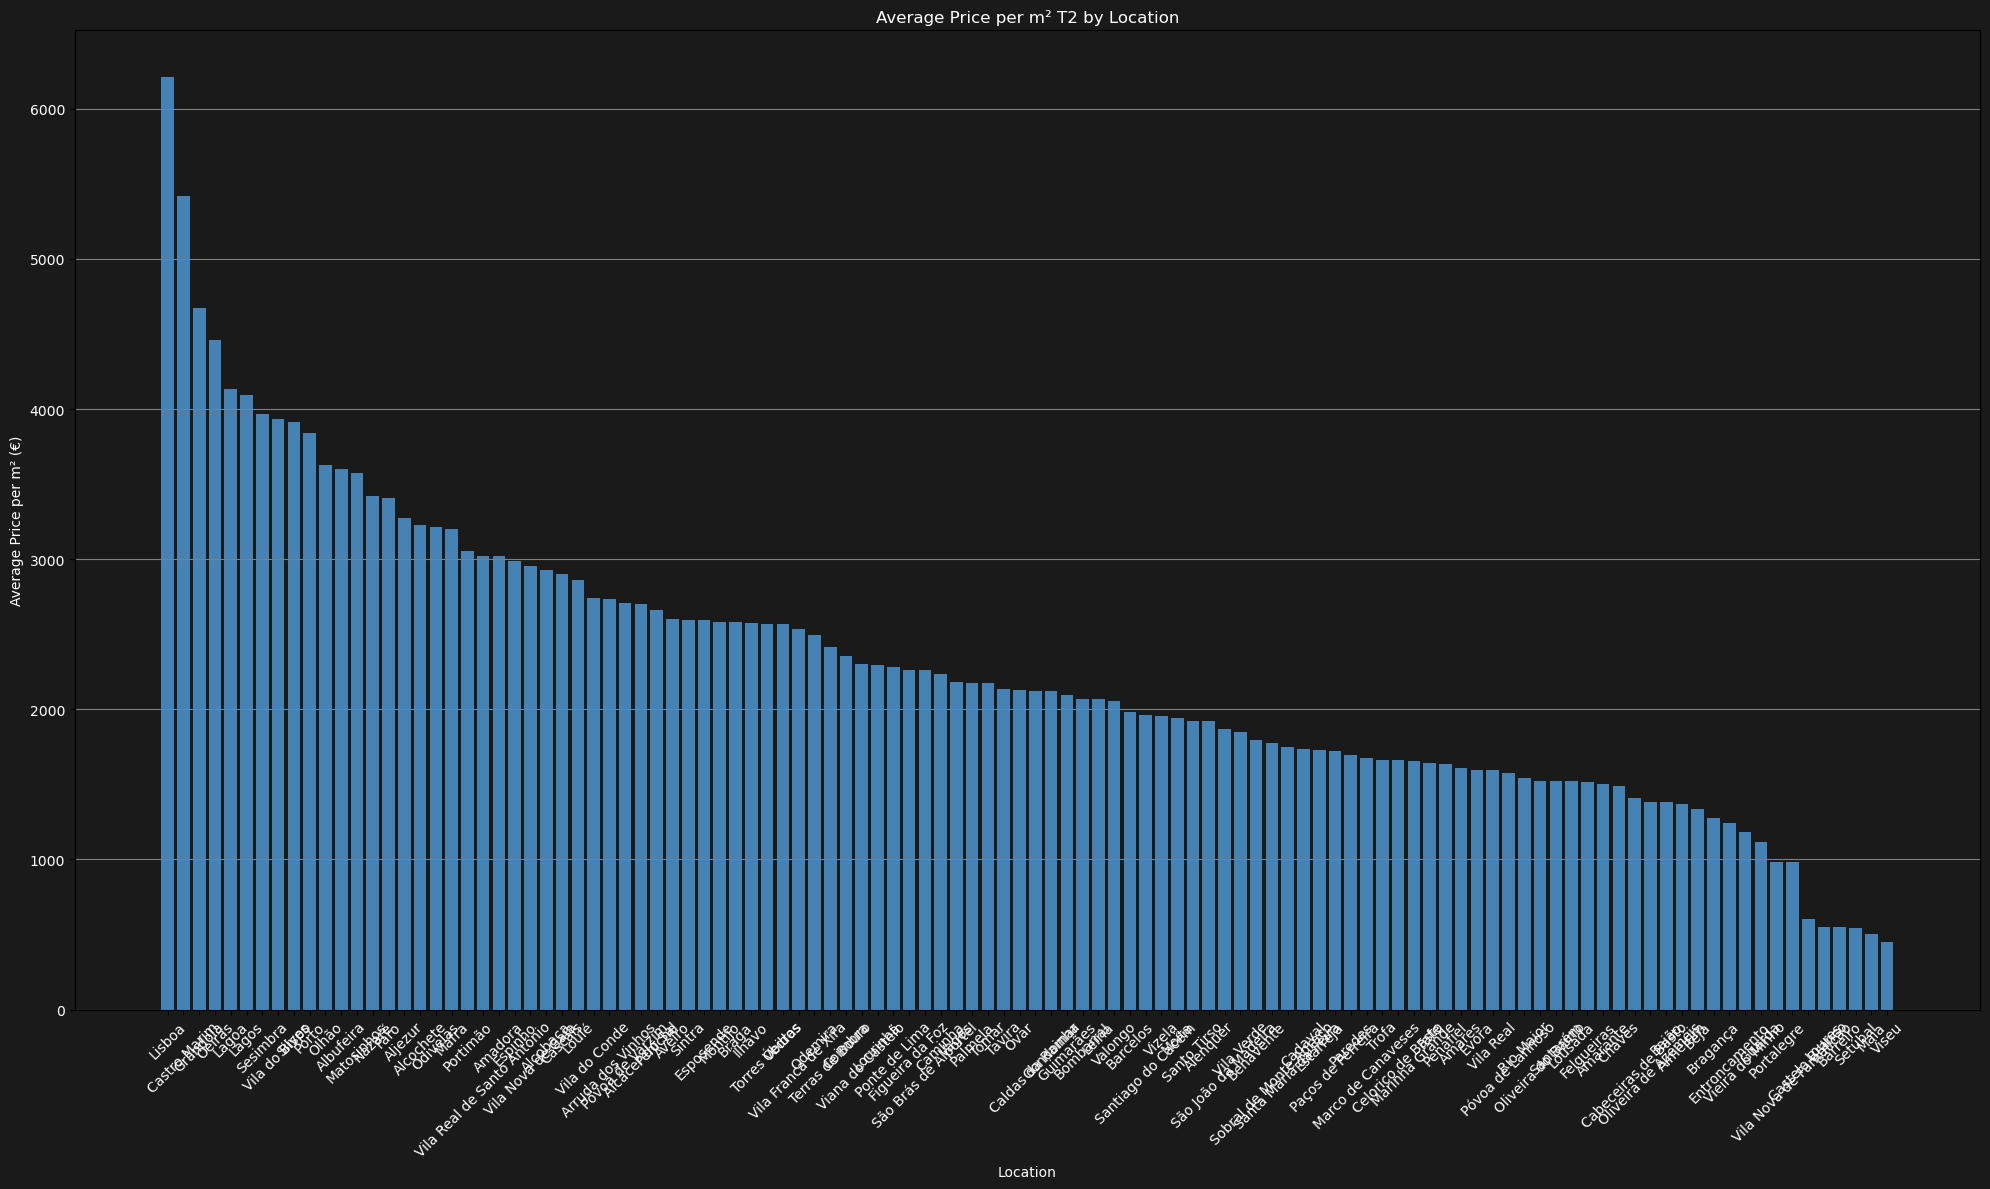

The average price for T2 per square meter for apartments on Idealista is EUR 21450
Summary of Listing Data by Location and Type T2:
                       Concelho    Total_Price Average_Price Average_Area Total_Area Number_Listings Average_Price_per_m2
45                       Lisboa  1,763,503,137       594,773           96    283,885           2,965                6,212
26                 Castro Marim     11,299,000       564,950          104      2,084              20                5,422
39                     Grândola     40,993,500       594,109          127      8,766              69                4,676
60                       Oeiras    178,046,305       474,790          106     39,927             375                4,459
42                        Lagoa     73,058,390       440,111          106     17,676             166                4,133
43                        Lagos    238,886,305       495,615          121     58,401             482                4,090
81            

In [88]:
apartment_variable = "T2"
apartment_property_type_variable_table = apartment_property_type_table[apartment_property_type_table['Title_Property_Type'] == apartment_variable]

# Set display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)        # Set width to avoid wrapping

# Group by both Location and Type_Python
apartment_property_type_variable_table = apartment_property_type_variable_table.groupby(['Concelho']).agg(
    Total_Price=('Price', 'sum'),
    Average_Price=('Price', 'mean'),
    Average_Area=('Listing_Area', 'mean'),
    Total_Area=('Listing_Area', 'sum'),
    Number_Listings=('Price', 'count')
).reset_index()

# Calculate Average_Price_per_m2
apartment_property_type_variable_table['Average_Price_per_m2'] = apartment_property_type_variable_table['Average_Price'].astype(float) / apartment_property_type_variable_table['Average_Area'].astype(float)

apartment_property_type_variable_table = apartment_property_type_variable_table.sort_values(by='Average_Price_per_m2', ascending=False)

total_sum_listing_type = apartment_property_type_variable_table['Number_Listings'].sum()

# Set the figure size for better visibility
plt.figure(figsize=(20, 12))

# Create a bar plot
plt.bar(apartment_property_type_variable_table['Concelho'], apartment_property_type_variable_table['Average_Price_per_m2'], color='#4682B4')

# Set background color to dark grey
plt.gcf().set_facecolor('#1A1A1A')  # Set the figure background color
plt.gca().set_facecolor('#1A1A1A')  # Set the axes background color

# Set titles and labels with white text for better contrast
plt.title(f'Average Price per m² {apartment_variable} by Location', fontsize=12, color='white')
plt.xlabel('Location', fontsize=10, color='white')
plt.ylabel('Average Price per m² (€)', fontsize=10, color='white')
plt.xticks(rotation=45, color='white')  # Rotate x labels for better readability
plt.yticks(color='white')  # Set y ticks color to white
plt.grid(axis='y', color='grey')  # Add gridlines in grey for better visibility

plt.tight_layout()
plt.show()

apartment_property_type_variable_table['Total_Price'] = apartment_property_type_variable_table['Total_Price'].apply(lambda x: f"{x:,.0f}")
apartment_property_type_variable_table['Average_Price'] = apartment_property_type_variable_table['Average_Price'].apply(lambda x: f"{x:,.0f}")
apartment_property_type_variable_table['Average_Area'] = apartment_property_type_variable_table['Average_Area'].apply(lambda x: f"{x:,.0f}")
apartment_property_type_variable_table['Number_Listings'] = apartment_property_type_variable_table['Number_Listings'].apply(lambda x: f"{x:,.0f}")
apartment_property_type_variable_table['Total_Area'] = apartment_property_type_variable_table['Total_Area'].apply(lambda x: f"{x:,.0f}")
apartment_property_type_variable_table['Average_Price_per_m2'] = apartment_property_type_variable_table['Average_Price_per_m2'].apply(lambda x: f"{x:,.0f}")

print(f"The average price for {apartment_variable} per square meter for apartments on Idealista is EUR {total_sum_listing_type}")
print(f"Summary of Listing Data by Location and Type {apartment_variable}:")
print(apartment_property_type_variable_table)

apartment_property_type_variable_table['Total_Price'] = pd.to_numeric(apartment_property_type_variable_table['Total_Price'].str.replace(",", ""), errors='coerce')
apartment_property_type_variable_table['Average_Price'] = pd.to_numeric(apartment_property_type_variable_table['Average_Price'].str.replace(",", ""), errors='coerce')
apartment_property_type_variable_table['Average_Area'] = pd.to_numeric(apartment_property_type_variable_table['Average_Area'].str.replace(",", ""), errors='coerce')
apartment_property_type_variable_table['Number_Listings'] = pd.to_numeric(apartment_property_type_variable_table['Number_Listings'].str.replace(",", ""), errors='coerce')
apartment_property_type_variable_table['Total_Area'] = pd.to_numeric(apartment_property_type_variable_table['Total_Area'].str.replace(",", ""), errors='coerce')
apartment_property_type_variable_table['Average_Price_per_m2'] = pd.to_numeric(apartment_property_type_variable_table['Average_Price_per_m2'].str.replace(",", ""), errors='coerce')


In [89]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)        # Set width to avoid wrapping

apartment_property_type_table_title_type = apartment_property_type_table.groupby('Title_Property_Type').agg(
    Total_Price=('Price', 'sum'),
    Average_Price=('Price', 'mean'),
    Average_Area=('Listing_Area', 'mean'),
    Total_Area=('Listing_Area', 'sum'),
    Number_Listings=('Price', 'count')
).reset_index()

# Calculate Average_Price_per_m2
apartment_property_type_table_title_type['Average_Price_per_m2'] = apartment_property_type_table_title_type['Average_Price'] / apartment_property_type_table_title_type['Average_Area']

apartment_property_type_table_title_type = apartment_property_type_table_title_type.sort_values(by='Average_Price_per_m2', ascending=False)

apartment_property_type_table_title_type['Total_Price'] = apartment_property_type_table_title_type['Total_Price'].apply(lambda x: f"{x:,.0f}")
apartment_property_type_table_title_type['Average_Price'] = apartment_property_type_table_title_type['Average_Price'].apply(lambda x: f"{x:,.0f}")
apartment_property_type_table_title_type['Average_Area'] = apartment_property_type_table_title_type['Average_Area'].apply(lambda x: f"{x:,.0f}")
apartment_property_type_table_title_type['Total_Area'] = apartment_property_type_table_title_type['Total_Area'].apply(lambda x: f"{x:,.0f}")
apartment_property_type_table_title_type['Number_Listings'] = apartment_property_type_table_title_type['Number_Listings'].apply(lambda x: f"{x:,.0f}")
apartment_property_type_table_title_type['Average_Price_per_m2'] = apartment_property_type_table_title_type['Average_Price_per_m2'].apply(lambda x: f"{x:,.0f}")

print(apartment_property_type_table_title_type)

apartment_property_type_table_title_type['Total_Price'] = pd.to_numeric(apartment_property_type_table_title_type['Total_Price'].str.replace(",", ""), errors='coerce')
apartment_property_type_table_title_type['Average_Price'] = pd.to_numeric(apartment_property_type_table_title_type['Average_Price'].str.replace(",", ""), errors='coerce')
apartment_property_type_table_title_type['Average_Area'] = pd.to_numeric(apartment_property_type_table_title_type['Average_Area'].str.replace(",", ""), errors='coerce')
apartment_property_type_table_title_type['Number_Listings'] = pd.to_numeric(apartment_property_type_table_title_type['Number_Listings'].str.replace(",", ""), errors='coerce')
apartment_property_type_table_title_type['Total_Area'] = pd.to_numeric(apartment_property_type_table_title_type['Total_Area'].str.replace(",", ""), errors='coerce')
apartment_property_type_table_title_type['Average_Price_per_m2'] = pd.to_numeric(apartment_property_type_table_title_type['Average_Price_per_m2'].str.replace(",", ""), errors='coerce')

   Title_Property_Type    Total_Price Average_Price Average_Area Total_Area Number_Listings Average_Price_per_m2
1            Penthouse    808,778,264     1,062,784          234    177,866             761                4,547
2                   T0    435,702,127       232,374           52     98,221           1,875                4,436
8                   T6    244,363,720     1,197,861          284     57,860             204                4,223
3                   T1  2,591,139,665       291,795           77    683,703           8,880                3,790
9                   T7     54,061,000     1,126,271          303     14,533              48                3,720
6                   T4  3,651,511,044       781,406          212    991,708           4,673                3,682
0               Duplex  1,719,953,531       674,492          197    501,255           2,550                3,431
11                  T9     13,326,913       951,922          302      4,222              14     

##### 2.6.2 Houses Analysis

In [90]:
house_property_type_table_1 = house_property_type_table.groupby('Concelho').agg(
    Total_Price=('Price', 'sum'),
    Number_Listings=('Price', 'count'),
    Total_Area=('Listing_Area', 'sum')
)

house_property_type_table_1["Average_Price_per_m2"] = house_property_type_table_1["Total_Price"] / house_property_type_table_1["Total_Area"]

house_property_type_table_1 = house_property_type_table_1.sort_values(by="Total_Price", ascending=False)

house_property_type_table_1['Total_Price'] = house_property_type_table_1['Total_Price'].apply(lambda x: f"{x:,.0f}")
house_property_type_table_1['Number_Listings'] = house_property_type_table_1['Number_Listings'].apply(lambda x: f"{x:,.0f}")
house_property_type_table_1['Total_Area'] = house_property_type_table_1['Total_Area'].apply(lambda x: f"{x:,.0f}")
house_property_type_table_1['Average_Price_per_m2'] = house_property_type_table_1['Average_Price_per_m2'].apply(lambda x: f"{x:,.0f}")

print(house_property_type_table_1)

house_property_type_table_1['Total_Price'] = pd.to_numeric(house_property_type_table_1['Total_Price'].str.replace(",", ""), errors='coerce')
house_property_type_table_1['Number_Listings'] = pd.to_numeric(house_property_type_table_1['Number_Listings'].str.replace(",", ""), errors='coerce')
house_property_type_table_1['Total_Area'] = pd.to_numeric(house_property_type_table_1['Total_Area'].str.replace(",", ""), errors='coerce')
house_property_type_table_1['Average_Price_per_m2'] = pd.to_numeric(house_property_type_table_1['Average_Price_per_m2'].str.replace(",", ""), errors='coerce')


                              Total_Price Number_Listings Total_Area Average_Price_per_m2
Concelho                                                                                 
Cascais                     3,366,763,973           1,735    976,297                3,449
Loulé                       3,094,400,243           1,845    648,340                4,773
Setúbal                     2,083,450,679           3,008    743,897                2,801
Sintra                      1,276,405,307           1,209    886,696                1,440
Albufeira                   1,131,866,649             941    405,493                2,791
Lagos                         980,242,749             685    202,257                4,847
Vila Nova de Gaia             886,195,751           1,319    500,498                1,771
Lisboa                        742,949,200             558    148,713                4,996
Faro                          697,724,982             935    485,528                1,437
Lagoa     

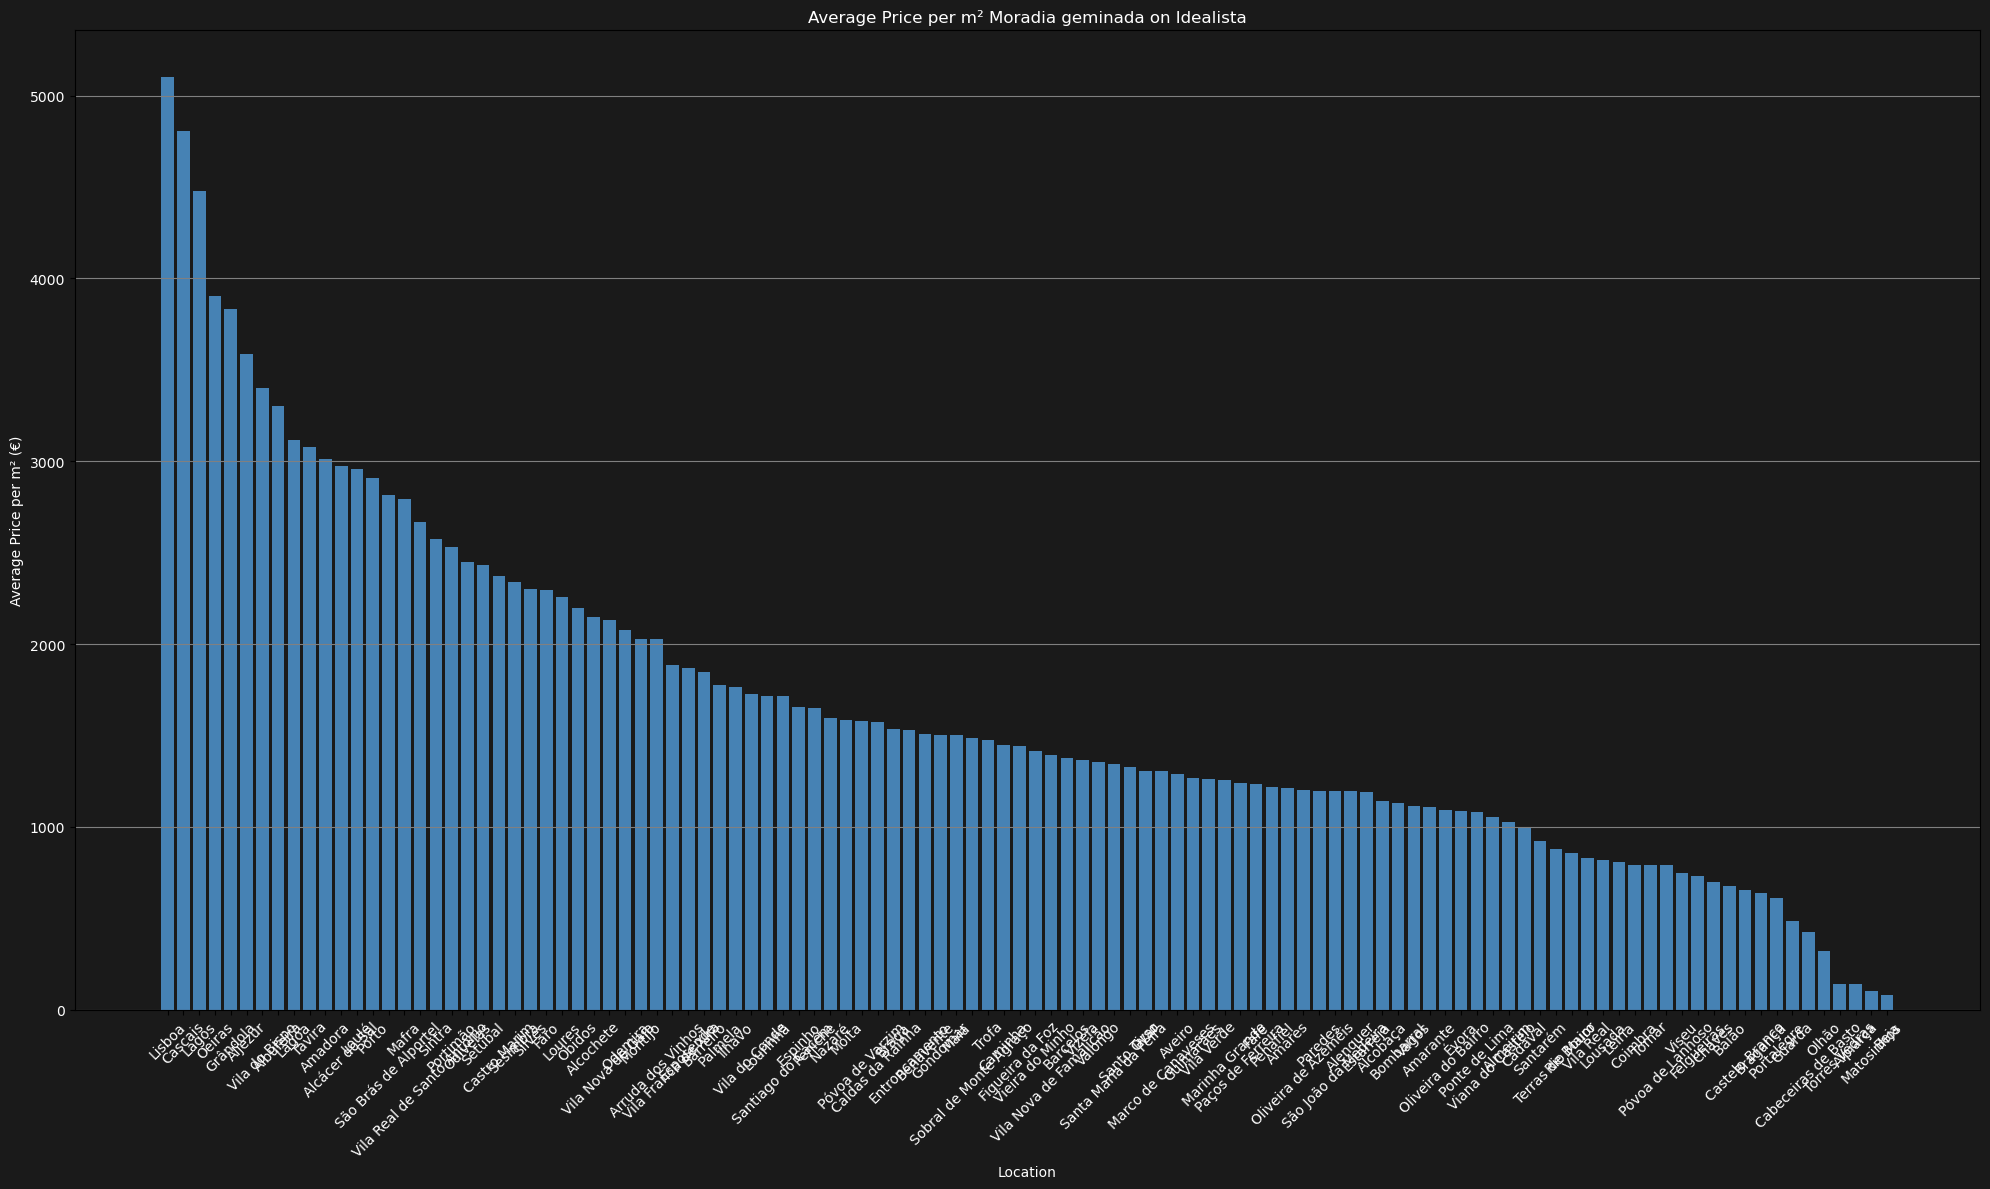

The average price for Moradia geminada per square meter on Idealista is EUR 6469
Summary of Listing Data by Location and Type Moradia geminada:
                       Concelho  Total_Price Average_Price Average_Area Total_Area Number_Listings Average_Price_per_m2
45                       Lisboa  120,265,500     1,113,569          218     23,570             108                5,102
25                      Cascais  350,225,199     1,224,564          255     72,883             286                4,805
43                        Lagos   52,876,950       813,492          182     11,813              65                4,476
60                       Oeiras   58,113,200       968,553          248     14,883              60                3,905
39                     Grândola   28,067,000       801,914          209      7,323              35                3,833
5                       Aljezur    6,161,944       560,177          156      1,717              11                3,589
103             

In [92]:
house_variable = "Moradia geminada"
house_property_type_table_2 = house_property_type_table[house_property_type_table['Title_Property_Type'] == house_variable]

# Set display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)        # Set width to avoid wrapping

# Group by both Location and Type_Python
house_property_type_table_2 = house_property_type_table_2.groupby(['Concelho']).agg(
    Total_Price=('Price', 'sum'),
    Average_Price=('Price', 'mean'),
    Average_Area=('Listing_Area', 'mean'),
    Total_Area=('Listing_Area', 'sum'),
    Number_Listings=('Price', 'count')
).reset_index()

# Calculate Average_Price_per_m2
house_property_type_table_2['Average_Price_per_m2'] = house_property_type_table_2['Average_Price'].astype(float) / house_property_type_table_2['Average_Area'].astype(float)

house_property_type_table_2 = house_property_type_table_2.sort_values(by='Average_Price_per_m2', ascending=False)

total_sum_listing_type_house = house_property_type_table_2['Number_Listings'].sum()

# Set the figure size for better visibility
plt.figure(figsize=(20, 12))

# Create a bar plot
plt.bar(house_property_type_table_2['Concelho'], house_property_type_table_2['Average_Price_per_m2'], color='#4682B4')

# Set background color to dark grey
plt.gcf().set_facecolor('#1A1A1A')  # Set the figure background color
plt.gca().set_facecolor('#1A1A1A')  # Set the axes background color

# Set titles and labels with white text for better contrast
plt.title(f'Average Price per m² {house_variable} on Idealista', fontsize=12, color='white')
plt.xlabel('Location', fontsize=10, color='white')
plt.ylabel('Average Price per m² (€)', fontsize=10, color='white')
plt.xticks(rotation=45, color='white')  # Rotate x labels for better readability
plt.yticks(color='white')  # Set y ticks color to white
plt.grid(axis='y', color='grey')  # Add gridlines in grey for better visibility

plt.tight_layout()
plt.show()

house_property_type_table_2['Total_Price'] = house_property_type_table_2['Total_Price'].apply(lambda x: f"{x:,.0f}")
house_property_type_table_2['Average_Price'] = house_property_type_table_2['Average_Price'].apply(lambda x: f"{x:,.0f}")
house_property_type_table_2['Average_Area'] = house_property_type_table_2['Average_Area'].apply(lambda x: f"{x:,.0f}")
house_property_type_table_2['Number_Listings'] = house_property_type_table_2['Number_Listings'].apply(lambda x: f"{x:,.0f}")
house_property_type_table_2['Total_Area'] = house_property_type_table_2['Total_Area'].apply(lambda x: f"{x:,.0f}")
house_property_type_table_2['Average_Price_per_m2'] = house_property_type_table_2['Average_Price_per_m2'].apply(lambda x: f"{x:,.0f}")

print(f"The average price for {house_variable} per square meter on Idealista is EUR {total_sum_listing_type_house}")
print(f"Summary of Listing Data by Location and Type {house_variable}:")
print(house_property_type_table_2)

house_property_type_table_2['Total_Price'] = pd.to_numeric(house_property_type_table_2['Total_Price'].str.replace(",", ""), errors='coerce')
house_property_type_table_2['Average_Price'] = pd.to_numeric(house_property_type_table_2['Average_Price'].str.replace(",", ""), errors='coerce')
house_property_type_table_2['Average_Area'] = pd.to_numeric(house_property_type_table_2['Average_Area'].str.replace(",", ""), errors='coerce')
house_property_type_table_2['Number_Listings'] = pd.to_numeric(house_property_type_table_2['Number_Listings'].str.replace(",", ""), errors='coerce')
house_property_type_table_2['Total_Area'] = pd.to_numeric(house_property_type_table_2['Total_Area'].str.replace(",", ""), errors='coerce')
house_property_type_table_2['Average_Price_per_m2'] = pd.to_numeric(house_property_type_table_2['Average_Price_per_m2'].str.replace(",", ""), errors='coerce')

#### 2.7 Info by Floor

In [93]:
def extract_number(text):
    # Check for the specific 'Cave' related terms
    if any(term in text.lower() for term in ['cave', 'cave sem elevador', 'cave com elevador']):
        return -1
    # Check for other terms that should return 0 (e.g., "Rés do chão", "Entreplanta", etc.)
    elif any(term in text.lower() for term in ['rés do chão', 'entreplanta', 'sem elevador', 'com elevador']):
        return 0
    # Extract the number if no specific term is found
    match = re.search(r'\d+', text)
    return int(match.group()) if match else None

df_no_duplicates['Floor_Number'] = df_no_duplicates['Floor'].apply(extract_number)

# Check for empty Floor_Number
empty_floors = df_no_duplicates[df_no_duplicates['Floor_Number'].isna()]
print(empty_floors)

# floor_pivot_check = df_no_duplicates.groupby('Floor_Number').agg(
#     Total_Price=('Price', 'sum')
# ).reset_index()

# print(floor_pivot_check)

Empty DataFrame
Columns: [Title, Price, Type, Area, Floor, URL, Location_1, Location_2, Location_3, Location_4, Concelho, Distrito, Title_Property_Type, Property_Type, Number_of_Rooms, Listing_Area, Floor_Number]
Index: []


In [94]:
# Create a new column 'Elevator_Status' based on 'Floor' column.
# If no information is found in column Floor about the elevator, it assumes there's no elevator
df_no_duplicates['Elevator_Status'] = np.where(df_no_duplicates['Floor'].str.contains('com elevador', case=False, na=False), 'com elevador',
                                               np.where(df_no_duplicates['Floor'].str.contains('sem elevador', case=False, na=False), 'sem elevador', 'sem elevador'))

# Check for empty Floor_Number
empty_elevator = df_no_duplicates[df_no_duplicates['Elevator_Status'].isna()]
print(empty_elevator)

elevator_pivot_check = df_no_duplicates.groupby('Elevator_Status').agg(
    Total_Price=('Price', 'sum')
).reset_index()

print(elevator_pivot_check)

Empty DataFrame
Columns: [Title, Price, Type, Area, Floor, URL, Location_1, Location_2, Location_3, Location_4, Concelho, Distrito, Title_Property_Type, Property_Type, Number_of_Rooms, Listing_Area, Floor_Number, Elevator_Status]
Index: []
  Elevator_Status   Total_Price
0    com elevador  1.869026e+10
1    sem elevador  4.590866e+10


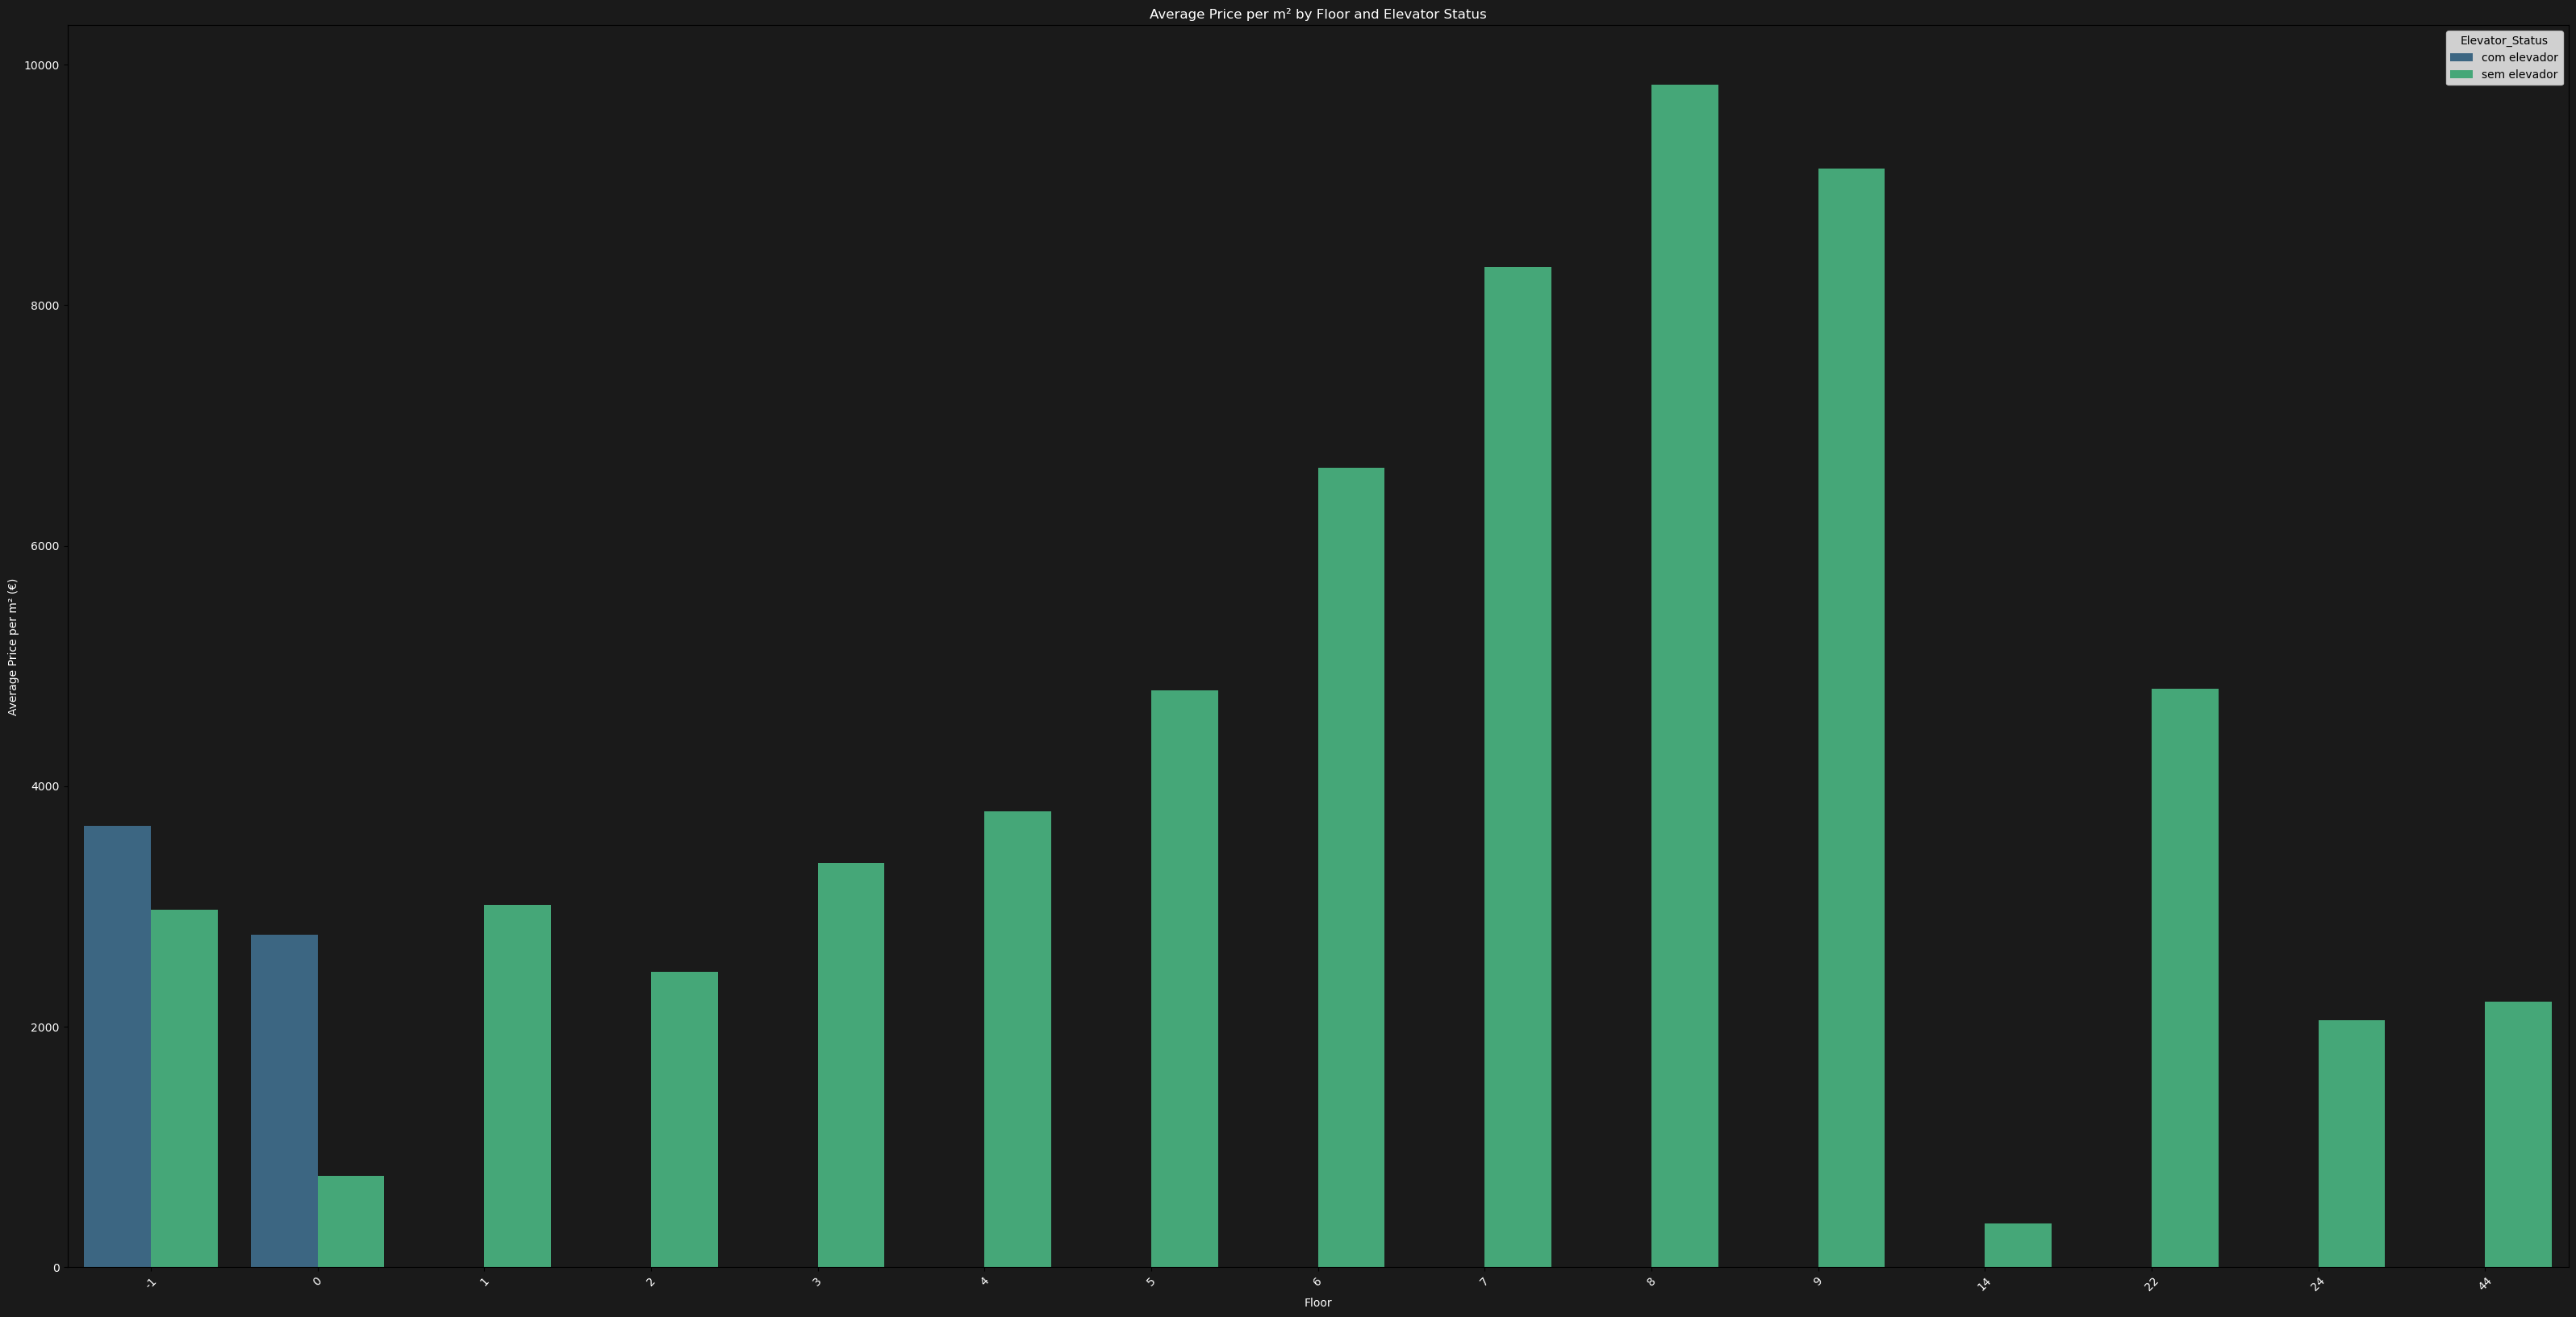

In [95]:
# Group by floor number and elevator status and compute aggregate statistics
floor_analysis = df_no_duplicates.groupby(['Floor_Number', 'Elevator_Status']).agg(
    Total_Price=('Price', 'sum'),
    Average_Price=('Price', 'mean'),
    Average_Area=('Listing_Area', 'mean'),
    Total_Area=('Listing_Area', 'sum'),
    Number_Listings=('Price', 'count')
)

# Calculate average price per m²
floor_analysis['Average_Price_per_m2'] = floor_analysis['Average_Price'].astype(float) / floor_analysis['Average_Area'].astype(float)

# Reset index to use in plotting
floor_analysis = floor_analysis.reset_index()

# Plotting the grouped bar chart
plt.figure(figsize=(40, 20))
sns.barplot(
    x='Floor_Number',
    y='Average_Price_per_m2',
    hue='Elevator_Status',
    data=floor_analysis,
    palette='viridis'
)

# Set plot aesthetics
plt.title('Average Price per m² by Floor and Elevator Status', color='white')
plt.xlabel('Floor', color='white')
plt.ylabel('Average Price per m² (€)', color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.gca().set_facecolor('#1A1A1A')
plt.gcf().set_facecolor('#1A1A1A')

plt.show()


#### 2.8 Linear Regression

In [96]:
df_no_duplicates.head(1)

,Title,Price,Type,Area,Floor,URL,Location_1,Location_2,Location_3,Location_4,Concelho,Distrito,Title_Property_Type,Property_Type,Number_of_Rooms,Listing_Area,Floor_Number,Elevator_Status
0,"Apartamento T2 na rua da Liberdade, 19, Carreg...",199000.0,T2,117 m² área bruta,3º andar com elevador,https://www.idealista.pt/comprar-casas/alenquer/,alenquer,,NaN,NaN,Alenquer,Lisboa,T2,apartment,2,117.0,0,com elevador


In [511]:
df_no_duplicates.to_csv('regression_test.csv', index=False, encoding='utf-8-sig', sep=',', quoting=1)  # quoting=1 uses minimal quoting

In [103]:
### Using Location_2 instead of Concelho or Distrito
### There populated entries on Location_2 are only ~64k. I filled the remaining 40k or so with Location_1, as I have no more data to fill it with

df_no_duplicates['Location_2'] = df_no_duplicates['Location_2'].fillna(df_no_duplicates['Location_1'])

# Check for missing Location_2
blank_types = df_no_duplicates[(df_no_duplicates['Location_2'].isnull())]
print(blank_types)

df_regression = df_no_duplicates

df_regression = df_regression[df_regression['Concelho'] == 'Cascais']

df_regression = df_regression.drop(columns=['Title', 'Area', 'Area', 'Floor', 'URL', 'Location_1', 'Location_3', 'Location_4', 'Concelho', 'Distrito', 'Title_Property_Type'])

Empty DataFrame
Columns: [Title, Price, Type, Area, Floor, URL, Location_1, Location_2, Location_3, Location_4, Concelho, Distrito, Title_Property_Type, Property_Type, Number_of_Rooms, Listing_Area, Floor_Number, Elevator_Status]
Index: []


Model Coefficients: [ 5.83089290e+00  2.88457681e+05 -6.76160096e+03 -1.79651696e+06
  1.90097419e+06 -1.11395256e+06 -2.00026881e+06 -3.49934416e+05
 -2.09214220e+04  7.39852613e+05  5.60833980e+05 -5.23989633e+05]
Intercept: 1914241.6324068937
R-squared: 0.29833859328916257
Mean Squared Error: 1325629815958.0698


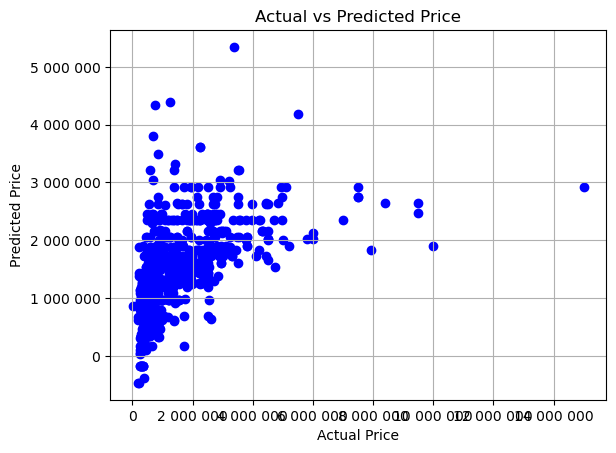

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, StandardScaler
import matplotlib.ticker as mticker

# Step 1: Perform One-Hot Encoding on the 'Gas Type' column
regression_model = pd.get_dummies(df_regression, columns=['Property_Type', "Elevator_Status", 'Location_2'], drop_first=True)  # drop_first=True avoids multicollinearity

# Step 2: Define the dependent variables (features) and independent variable (target)
X = regression_model[['Listing_Area', 'Number_of_Rooms', 'Floor_Number'] + [col for col in regression_model.columns if ("Property_Type" in col or "Elevator_Status" in col or "Location_2" in col)]]
y = regression_model['Price']

# Step 3: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Predict the test set results
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

# Optional: Plot actual vs predicted prices
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")

formatter = mticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(",", " "))
plt.gca().xaxis.set_major_formatter(formatter)  # Format x-axis
plt.gca().yaxis.set_major_formatter(formatter)  # Format y-axis

plt.grid(True)
plt.show()

In [105]:
# Print all coefficients with their corresponding feature names
coefficients = model.coef_
features = X_train.columns

print("\nModel Coefficients:")
for feature, coef in zip(features, coefficients):
    print(f"{feature}: {coef}")


Model Coefficients:
Listing_Area: 5.830892902854864
Number_of_Rooms: 288457.68069949676
Floor_Number: -6761.600960733654
Property_Type_apartment: -1796516.958224298
Property_Type_farm: 1900974.1937934917
Property_Type_house: -1113952.560822114
Property_Type_other: -2000268.8125840398
Elevator_Status_sem elevador: -349934.4159725853
Location_2_carcavelos-e-parede: -20921.42200078185
Location_2_cascais: 739852.612849464
Location_2_estoril: 560833.9798335901
Location_2_sao-domingos-de-rana: -523989.63330616715
